In [14]:
from xmitgcm import open_mdsdataset
import xmitgcm 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import cmocean
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import ffmpeg
from matplotlib import animation

import MITgcmutils
import math
import netCDF4 as nc
from scipy.io import savemat
import scipy as sc
import scipy.io as sio
import scipy.interpolate as sciint
import warnings
import datetime
warnings.filterwarnings("ignore")

In [30]:
project='Sponge'
ed='run7/'

location='/Users/ameliaking/Proyecto/Codigo/NGC/'+ str(project) + '/Files/output/' + str(ed) #'/Users/ameliaking/Proyecto/Codigo/Idealizada/ChangeDim/'

var='dynDiag'

ds=xr.open_dataset(str(location) +  str(var) + '.nc')
   

# Steady state?

In [31]:
params = {'font.size': 10,
          'figure.figsize': (6, 4),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

### How is the boundary?

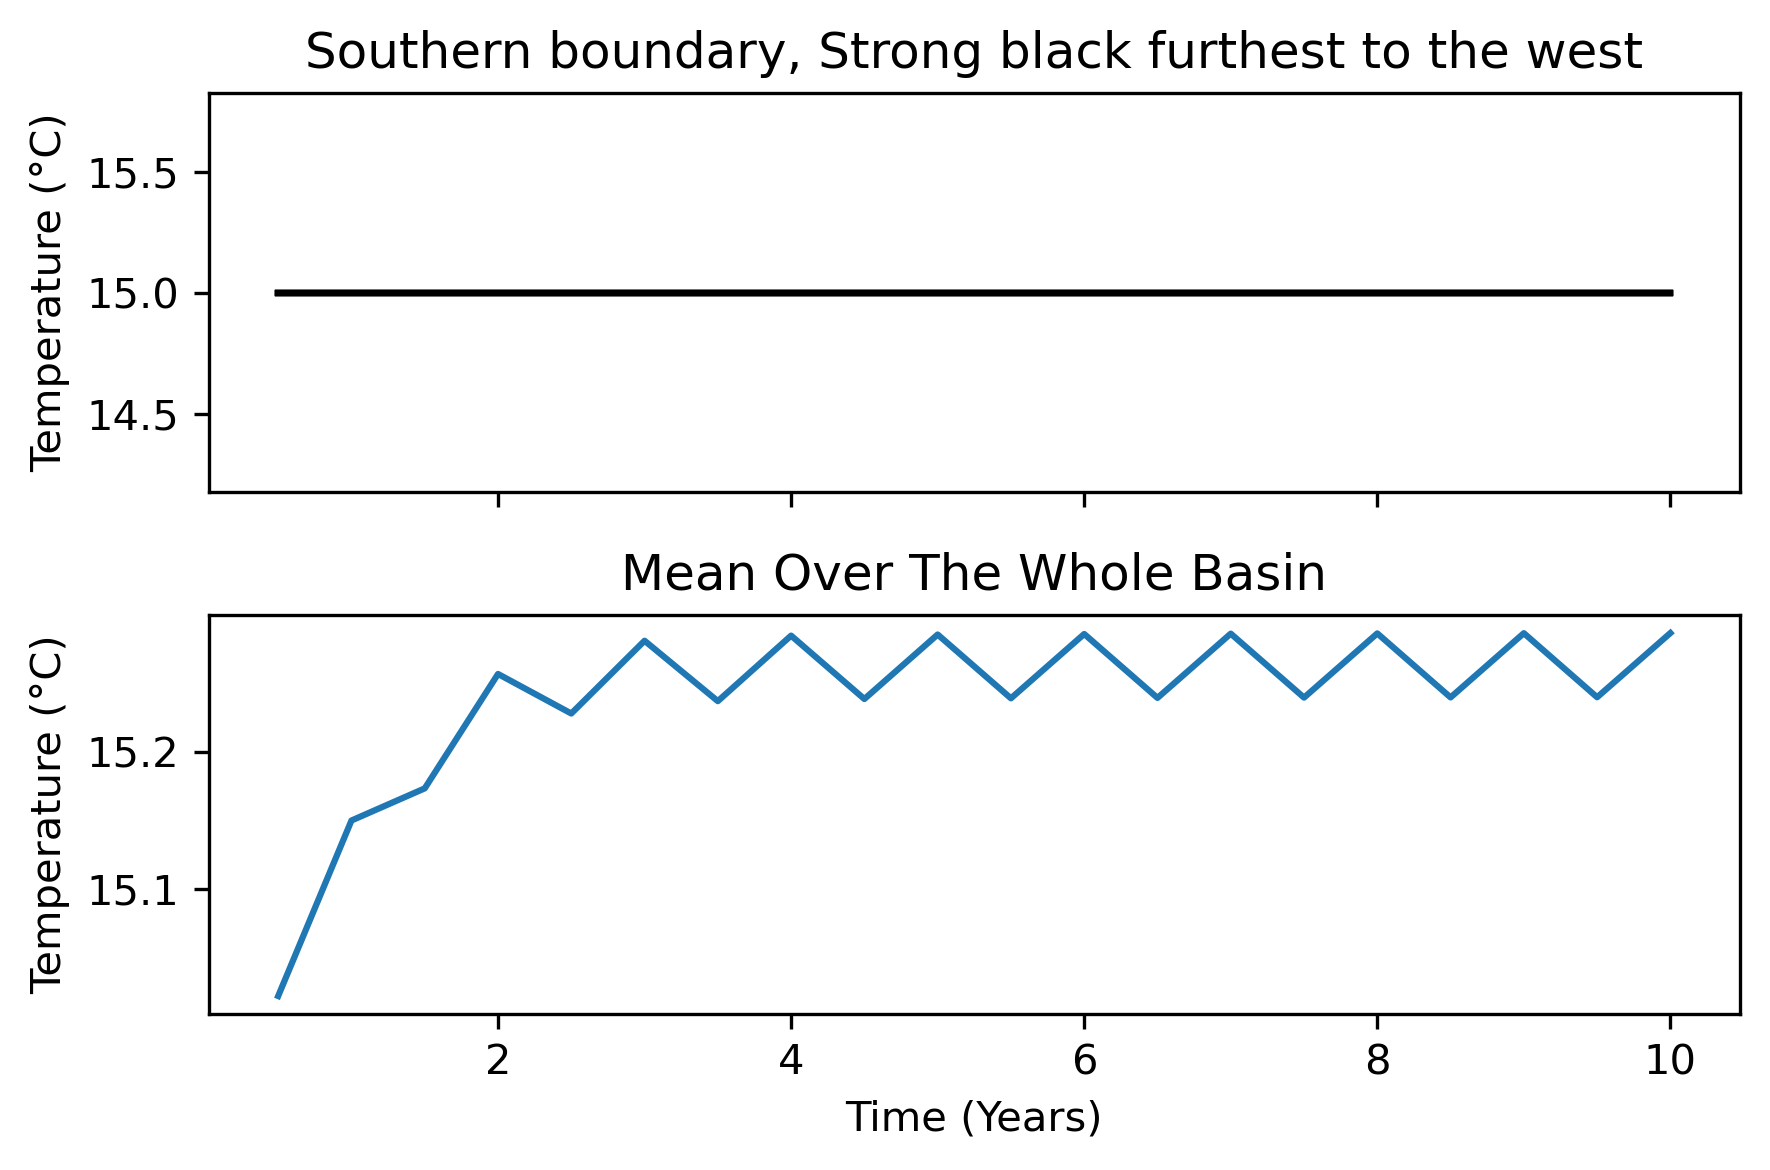

In [32]:
fig,axin=plt.subplots(2)
ax=axin[0]
k=0.6
for i in np.arange(1,len(ds.THETA[0,4,0,:])-1,2):
    k=k+0.4
    ax.plot(ds.T.values/(60*60*24*360),ds.THETA[:,4,0,i],label=f'{ds.X[i].values/1000:.1f} km',c='k',alpha=1/k)

#ax.legend()
ax.xaxis.set_tick_params(labelbottom=False)
ax.set(ylabel='Temperature (°C)',title='Southern boundary, Strong black furthest to the west')

ax=axin[1]

ax.plot(ds.T.values/(60*60*24*360),np.mean(np.mean(np.mean(ds.THETA[:,:,:-1,1:-1],axis=1),axis=1),axis=1))

ax.set(xlabel='Time (Years)',ylabel='Temperature (°C)',title='Mean Over The Whole Basin')

fig.tight_layout()
plt.savefig('../' + str(project)+'/Figures/' +str(ed)+ 'OBCStest.png', bbox_inches='tight')

# Integrated flow

In [33]:
params = {'font.size': 10,
          'figure.figsize': (6, 4),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

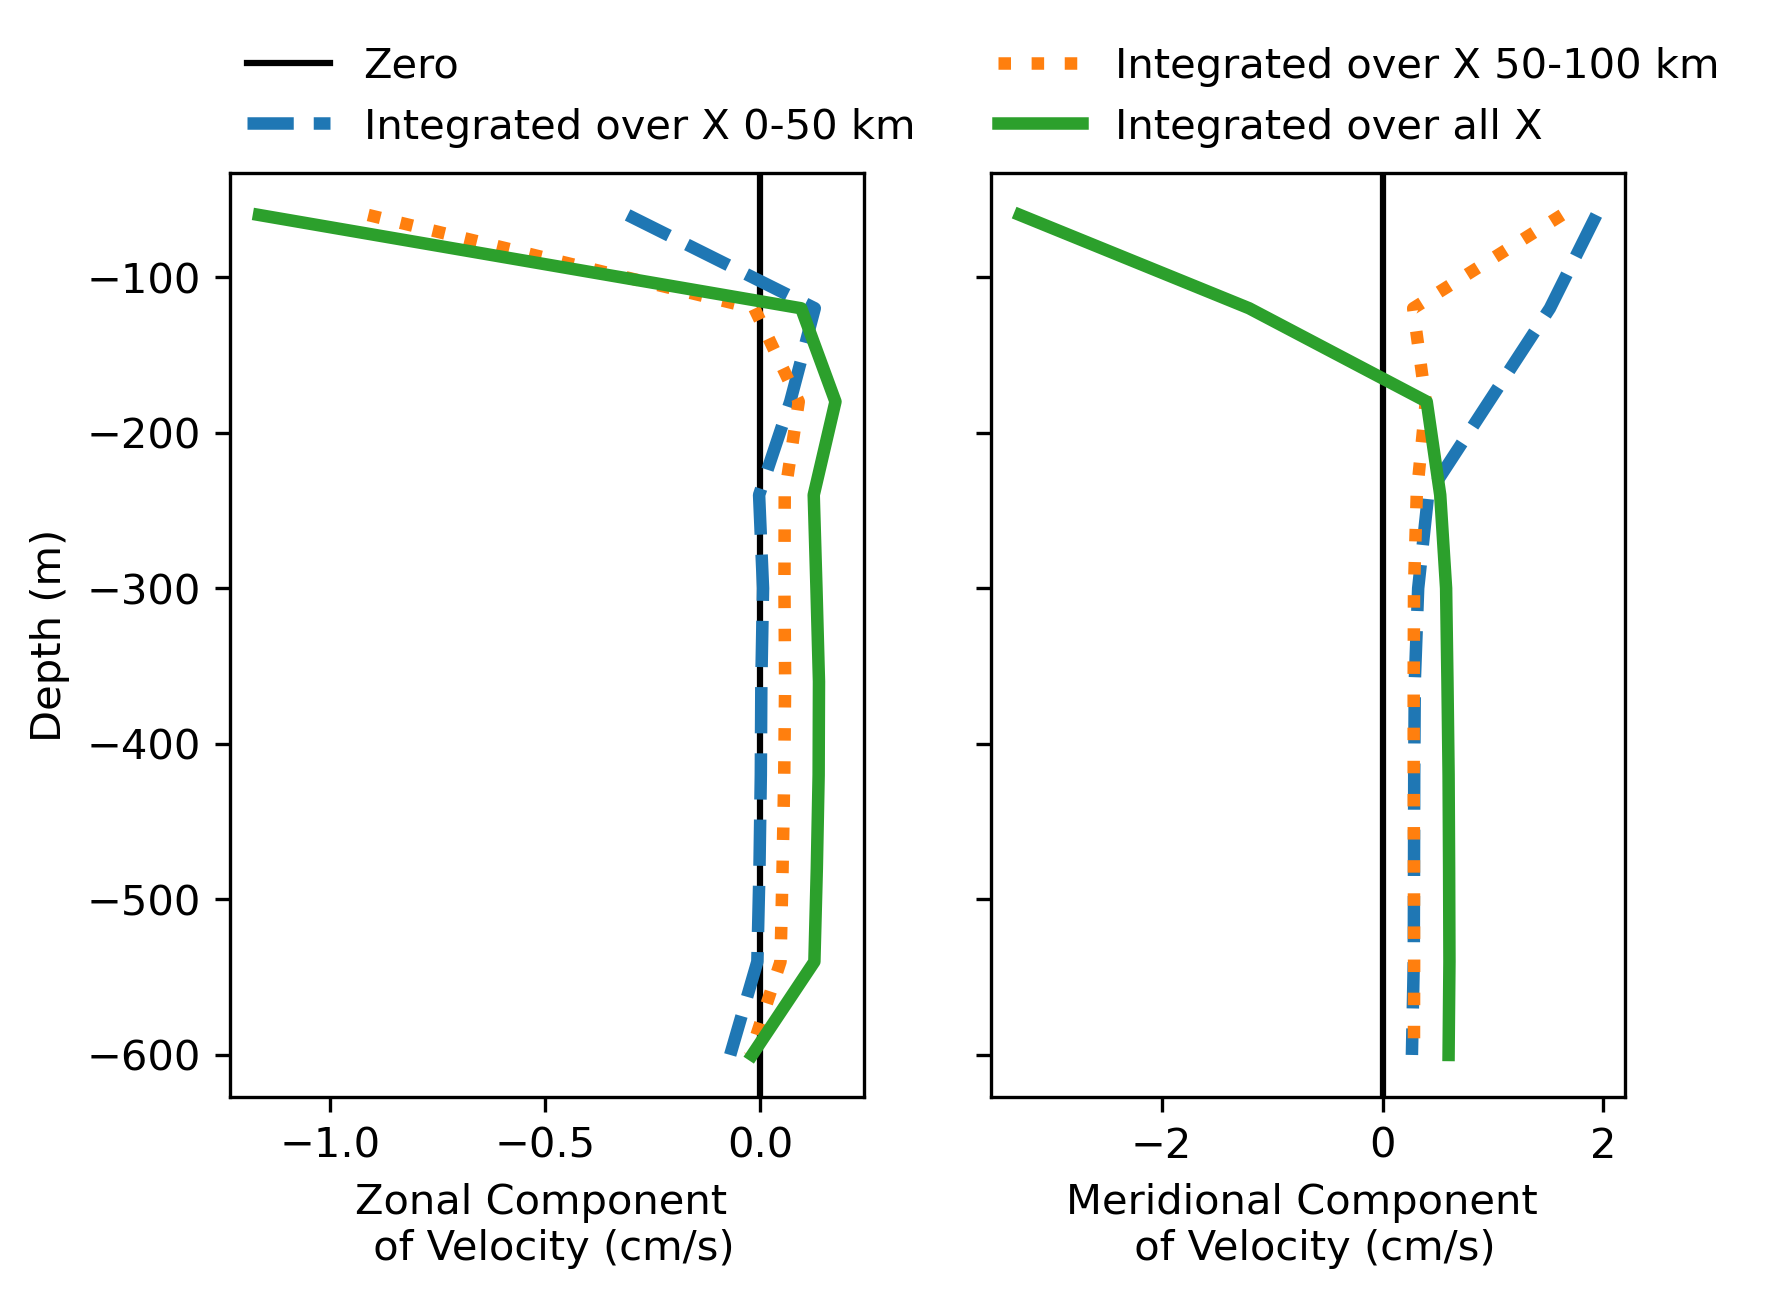

In [34]:
inarr=ds.UVEL[:,:,55,:].values*100
fig,axin=plt.subplots(1,2)
ax=axin[0]
xlab= 'Zonal Component \n of Velocity (cm/s)'#'Meridional Transport of Density (kg/m$^2$/s)'

ax.axvline(0,color='k',label='Zero')

ax.plot(np.sum(inarr[-1,:,:10],axis=1)/(10),ds.diag_levels*-60,linestyle='dashed',linewidth=3,label='Integrated over X 0-50 km')
ax.plot(np.sum(inarr[-1,:,10:20],axis=1)/(10),ds.diag_levels*-60,linestyle='dotted',linewidth=3,label='Integrated over X 50-100 km')
ax.plot(np.sum(inarr[-1],axis=1)/(20),ds.diag_levels*-60, linewidth=3,label='Integrated over all X')
ax.set(xlabel=xlab,ylabel='Depth (m)')



ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

ax=axin[1]
inarr=ds.VVEL[:,:,55,:].values*100
xlab= 'Meridional Component \n of Velocity (cm/s)'#'Meridional Transport of Density (kg/m$^2$/s)'

ax.axvline(0,color='k',label='Zero')

ax.plot(np.sum(inarr[-1,:,:10],axis=1)/(10),ds.diag_levels*-60,linestyle='dashed',linewidth=3,label='Integrated over X 0-50 km')
ax.plot(np.sum(inarr[-1,:,10:20],axis=1)/(10),ds.diag_levels*-60,linestyle='dotted',linewidth=3,label='Integrated over X 50-100 km')
ax.plot(np.sum(inarr[-1],axis=1)/(20),ds.diag_levels*-60, linewidth=3,label='Integrated over all X')
ax.set(xlabel=xlab)

ax.yaxis.set_tick_params(labelleft=False)

#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
 #           borderaxespad=0, frameon=False)

#fig.patch.set_alpha(0.0)
plt.savefig('../' + str(project)+'/Figures/' +str(ed)+ 'LastYearVelMeridNew.png', bbox_inches='tight')

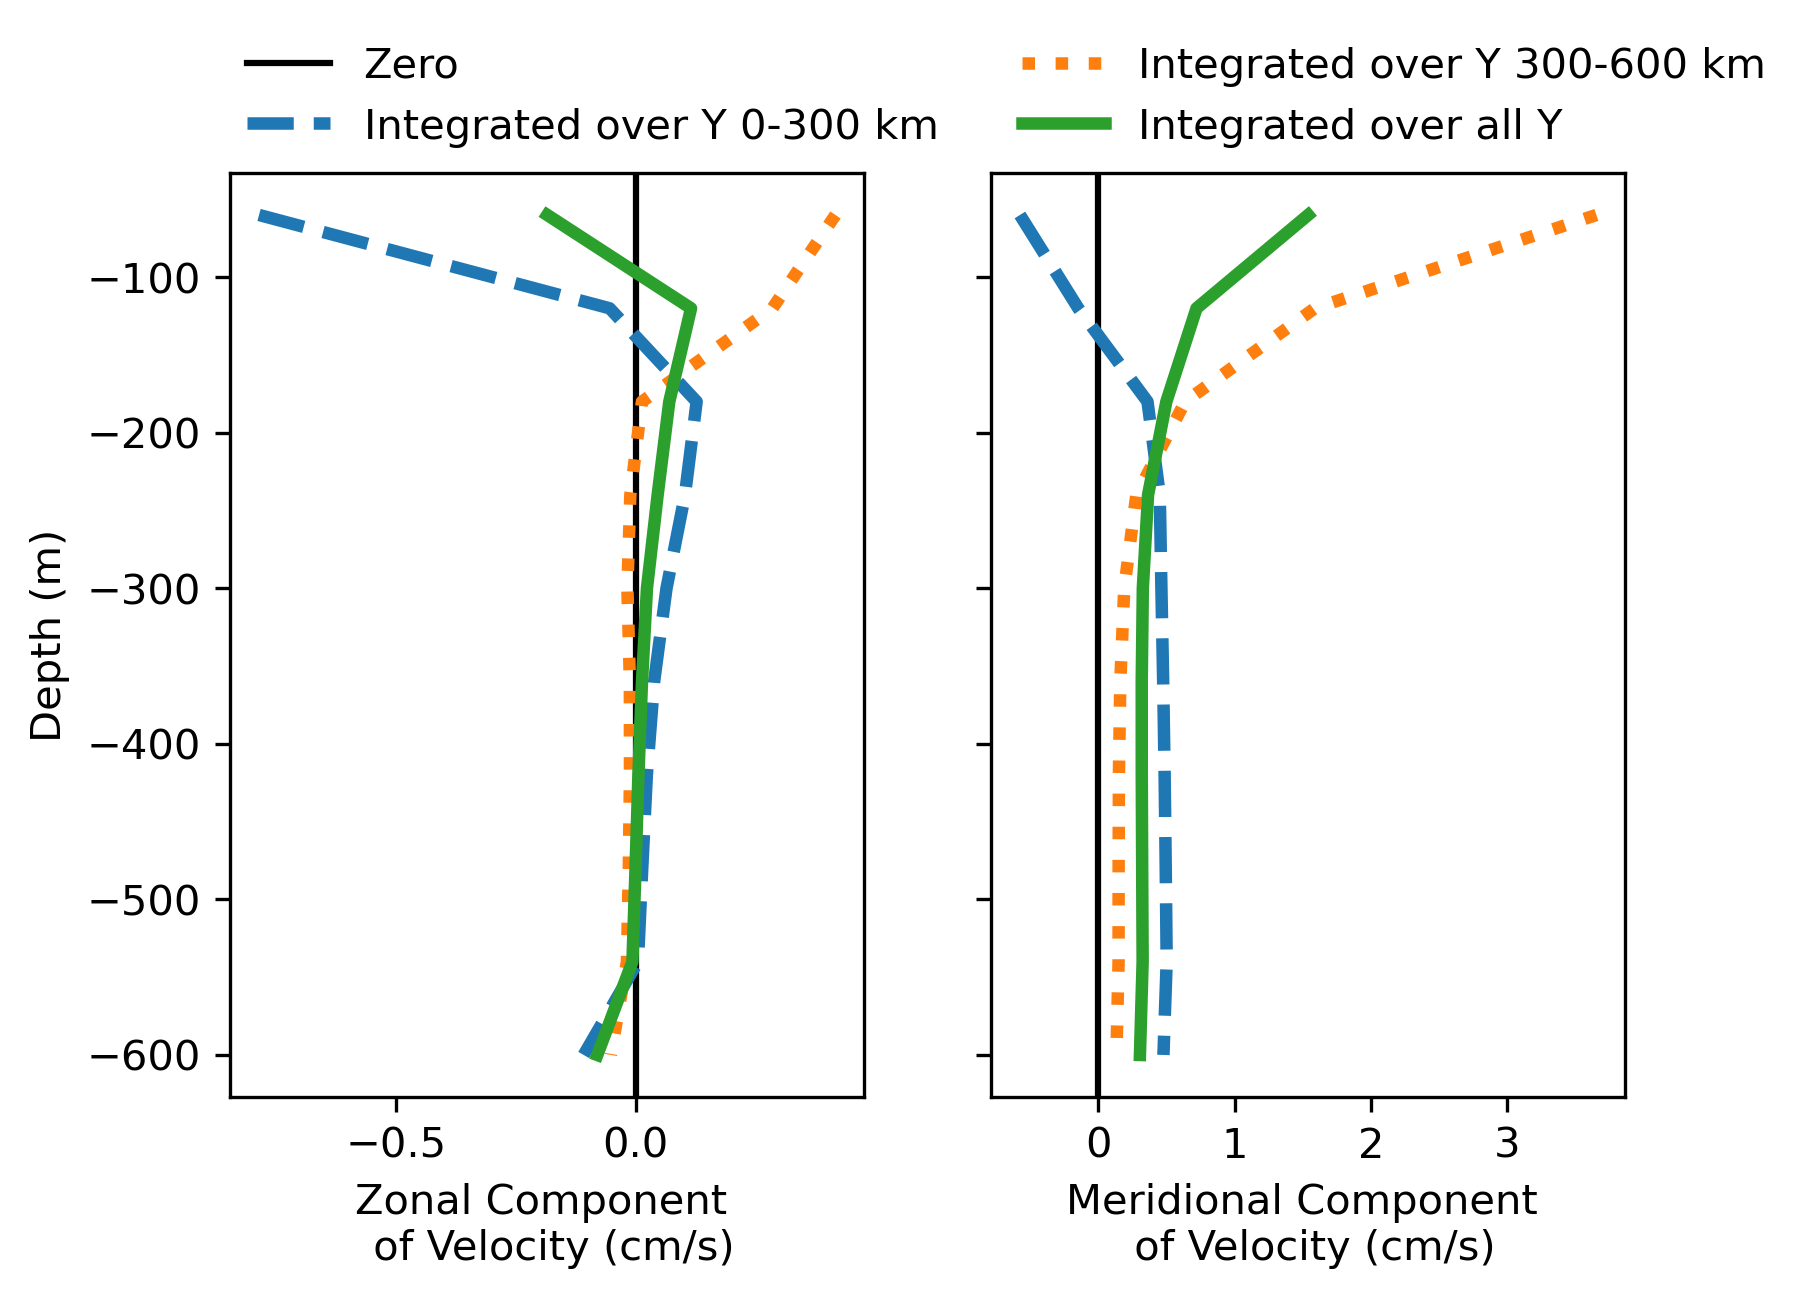

In [35]:
inarr=ds.UVEL[:,:,:,10].values*100
fig,axin=plt.subplots(1,2)
ax=axin[0]
xlab= 'Zonal Component \n of Velocity (cm/s)'#'Meridional Transport of Density (kg/m$^2$/s)'

ax.axvline(0,color='k',label='Zero')

ax.plot(np.sum(inarr[-1,:,:60],axis=1)/(60),ds.diag_levels*-60,linestyle='dashed',linewidth=3,label='Integrated over Y 0-300 km')
ax.plot(np.sum(inarr[-1,:,60:],axis=1)/(60),ds.diag_levels*-60,linestyle='dotted',linewidth=3,label='Integrated over Y 300-600 km')
ax.plot(np.sum(inarr[-1],axis=1)/(120),ds.diag_levels*-60, linewidth=3,label='Integrated over all Y')
ax.set(xlabel=xlab,ylabel='Depth (m)')



ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

ax=axin[1]
inarr=ds.VVEL[:,:,:,10].values*100
xlab= 'Meridional Component \n of Velocity (cm/s)'#'Meridional Transport of Density (kg/m$^2$/s)'

ax.axvline(0,color='k',label='Zero')

ax.plot(np.sum(inarr[-1,:,:60],axis=1)/(60),ds.diag_levels*-60,linestyle='dashed',linewidth=3,label='Integrated over X 0-50 km')
ax.plot(np.sum(inarr[-1,:,60:],axis=1)/(60),ds.diag_levels*-60,linestyle='dotted',linewidth=3,label='Integrated over X 50-100 km')
ax.plot(np.sum(inarr[-1],axis=1)/(120),ds.diag_levels*-60, linewidth=3,label='Integrated over all Y')
ax.set(xlabel=xlab)

ax.yaxis.set_tick_params(labelleft=False)

#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
 #           borderaxespad=0, frameon=False)

#fig.patch.set_alpha(0.0)
plt.savefig('../' + str(project)+'/Figures/' +str(ed)+ 'LastYearVelZonalNew.png', bbox_inches='tight')



In [36]:
params = {'font.size': 10,
          'figure.figsize': (6, 6),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

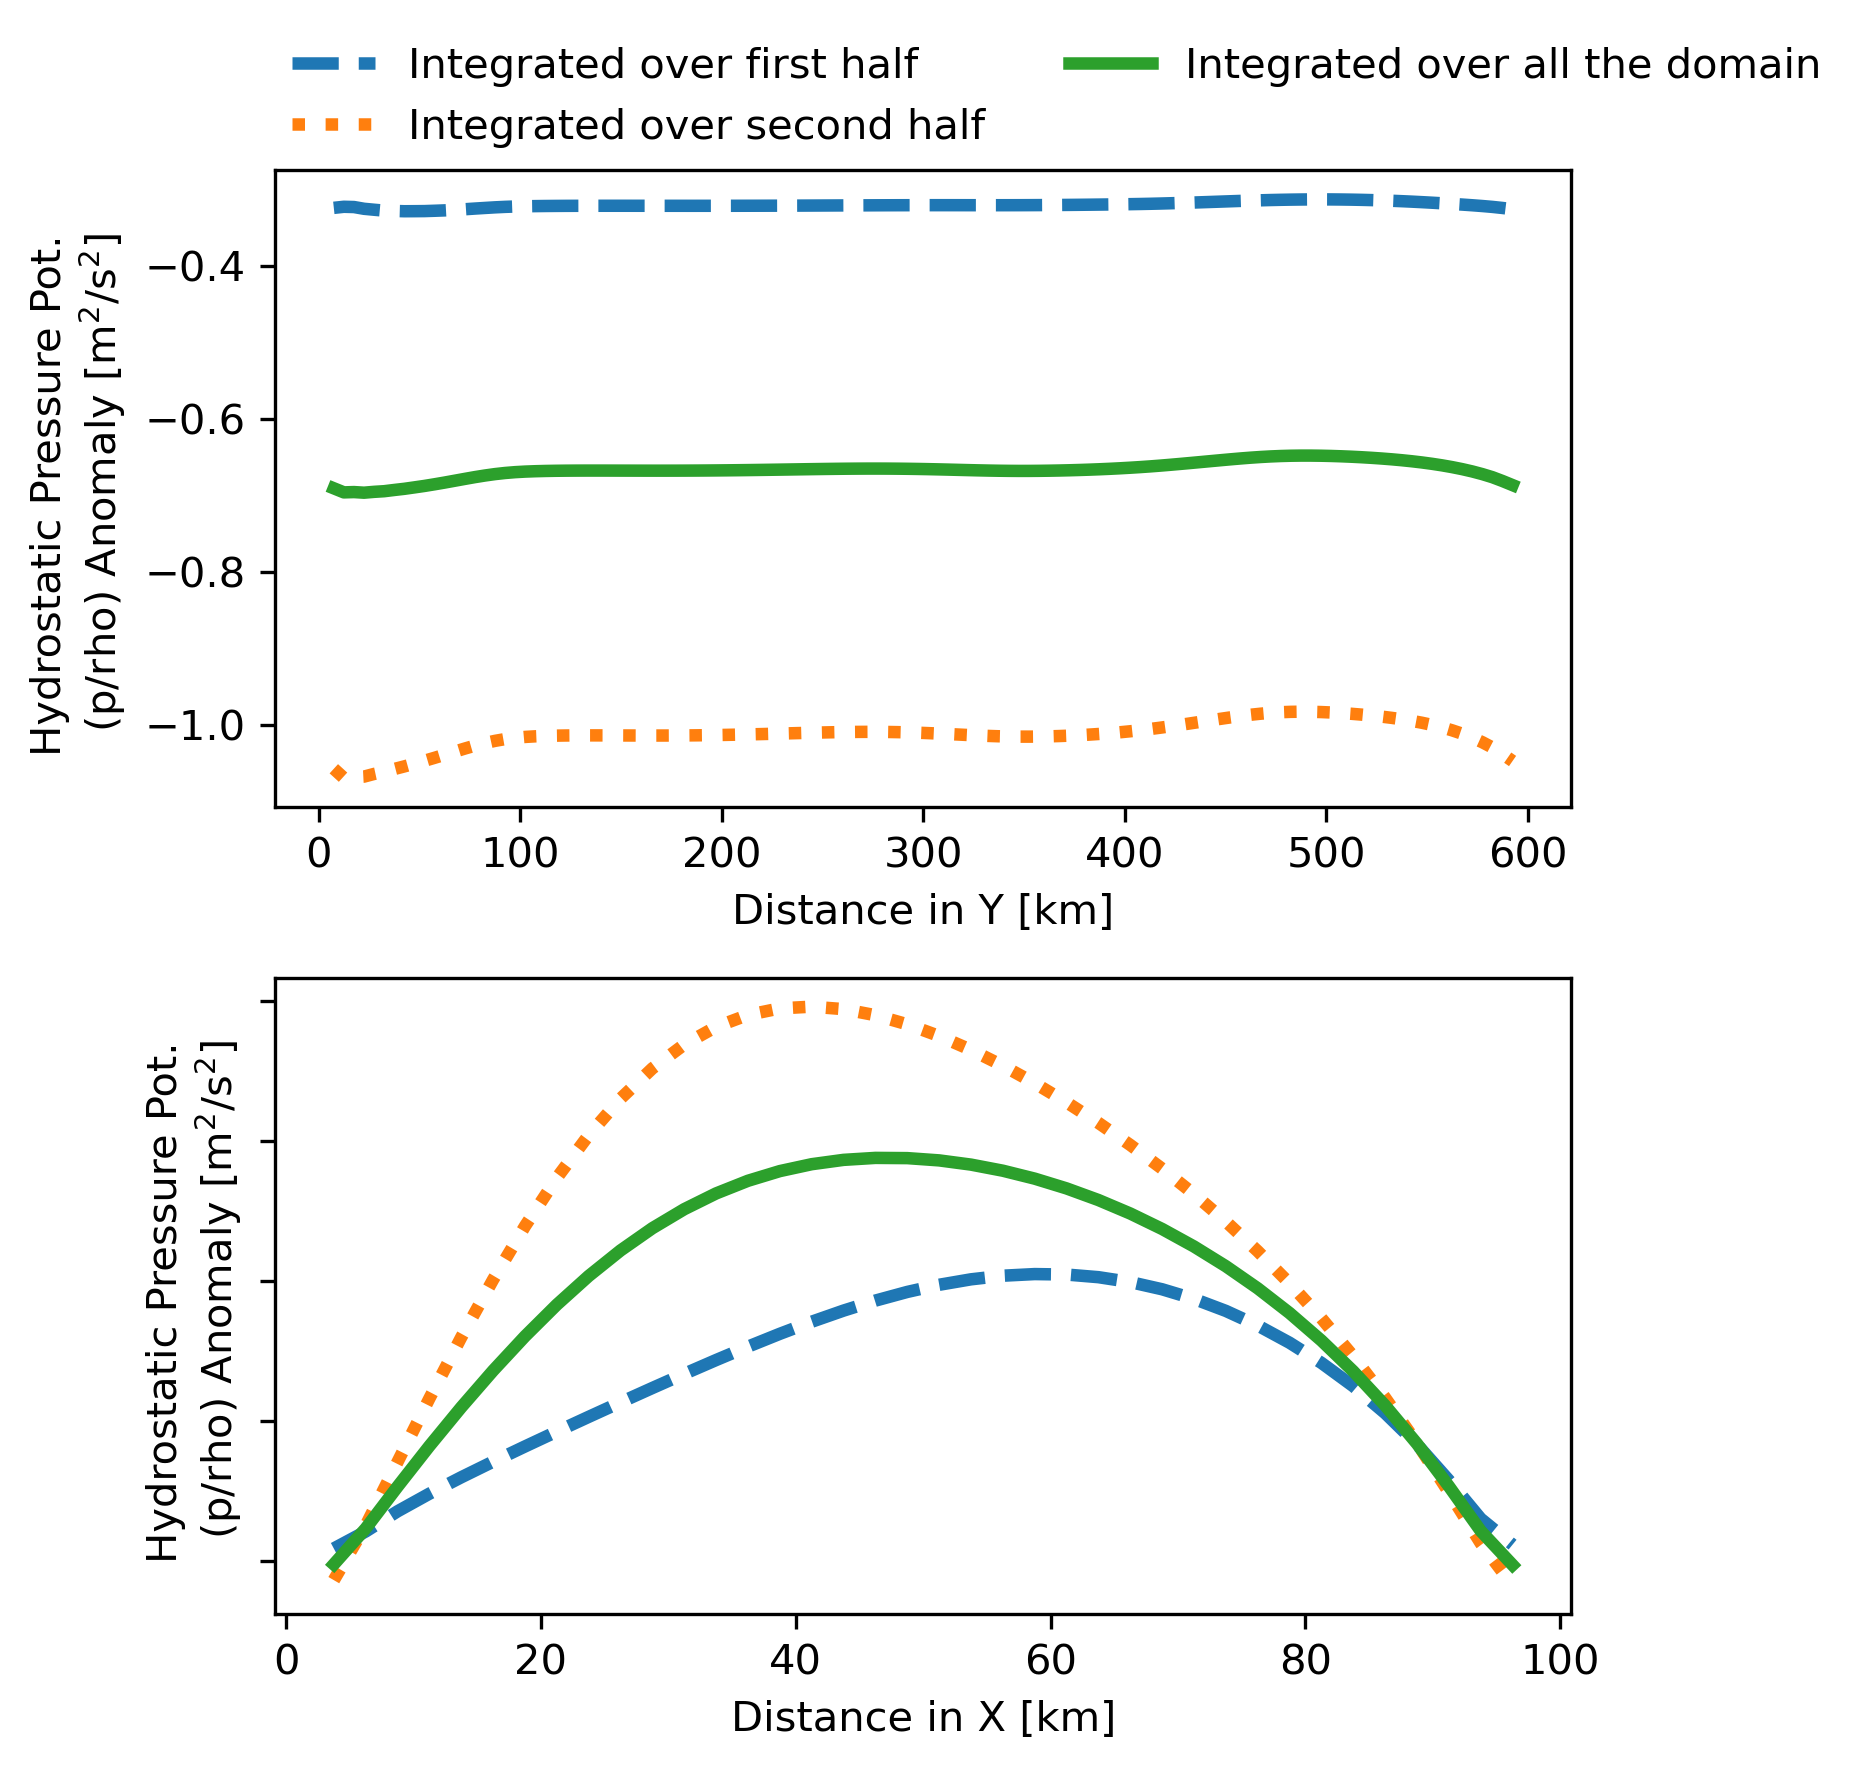

In [37]:
inarr=ds.PHIHYD[:,:,:,:].values
fig,axin=plt.subplots(2)
ax=axin[0]
xlab= 'Hydrostatic Pressure Pot. \n (p/rho) Anomaly [m$^2$/s$^2$]'#'Meridional Transport of Density (kg/m$^2$/s)'

#ax.axvline(0,color='k',label='Zero')

ax.plot(ds.Y[1:-1]/1000,np.sum(np.sum(inarr[-1,:,1:-1,1:10],axis=0),axis=1)/(9*10),linestyle='dashed',linewidth=3,label='Integrated over first half')
ax.plot(ds.Y[1:-1]/1000,np.sum(np.sum(inarr[-1,:,1:-1,10:-1],axis=0),axis=1)/(9*10),linestyle='dotted',linewidth=3,label='Integrated over second half')
ax.plot(ds.Y[1:-1]/1000,np.sum(np.sum(inarr[-1,:,1:-1,1:-1],axis=0),axis=1)/(18*10), linewidth=3,label='Integrated over all the domain')
ax.set(xlabel='Distance in Y [km]',ylabel=xlab)



ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

ax=axin[1]
inarr=ds.PHIHYD[:,:,:,:].values
xlab= 'Hydrostatic Pressure Pot. \n (p/rho) Anomaly [m$^2$/s$^2$]'#'Meridional Transport of Density (kg/m$^2$/s)'

#ax.axvline(0,color='k',label='Zero')

ax.plot(ds.X[1:-1]/1000,np.sum(np.sum(inarr[-1,:,1:60,1:-1],axis=0),axis=0)/(10*59),linestyle='dashed',linewidth=3,label='Integrated over X 0-50 km')
ax.plot(ds.X[1:-1]/1000,np.sum(np.sum(inarr[-1,:,60:-1,1:-1],axis=0),axis=0)/(10*59),linestyle='dotted',linewidth=3,label='Integrated over X 50-100 km')
ax.plot(ds.X[1:-1]/1000,np.sum(np.sum(inarr[-1,:,1:-1,1:-1],axis=0),axis=0)/(10*118), linewidth=3,label='Integrated over all X')
ax.set(xlabel='Distance in X [km]',ylabel=xlab)

ax.yaxis.set_tick_params(labelleft=False)

#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
 #           borderaxespad=0, frameon=False)

fig.tight_layout()
plt.savefig('../' + str(project)+'/Figures/' +str(ed)+ 'LastYearPHIHYDAlldepth.png', bbox_inches='tight')



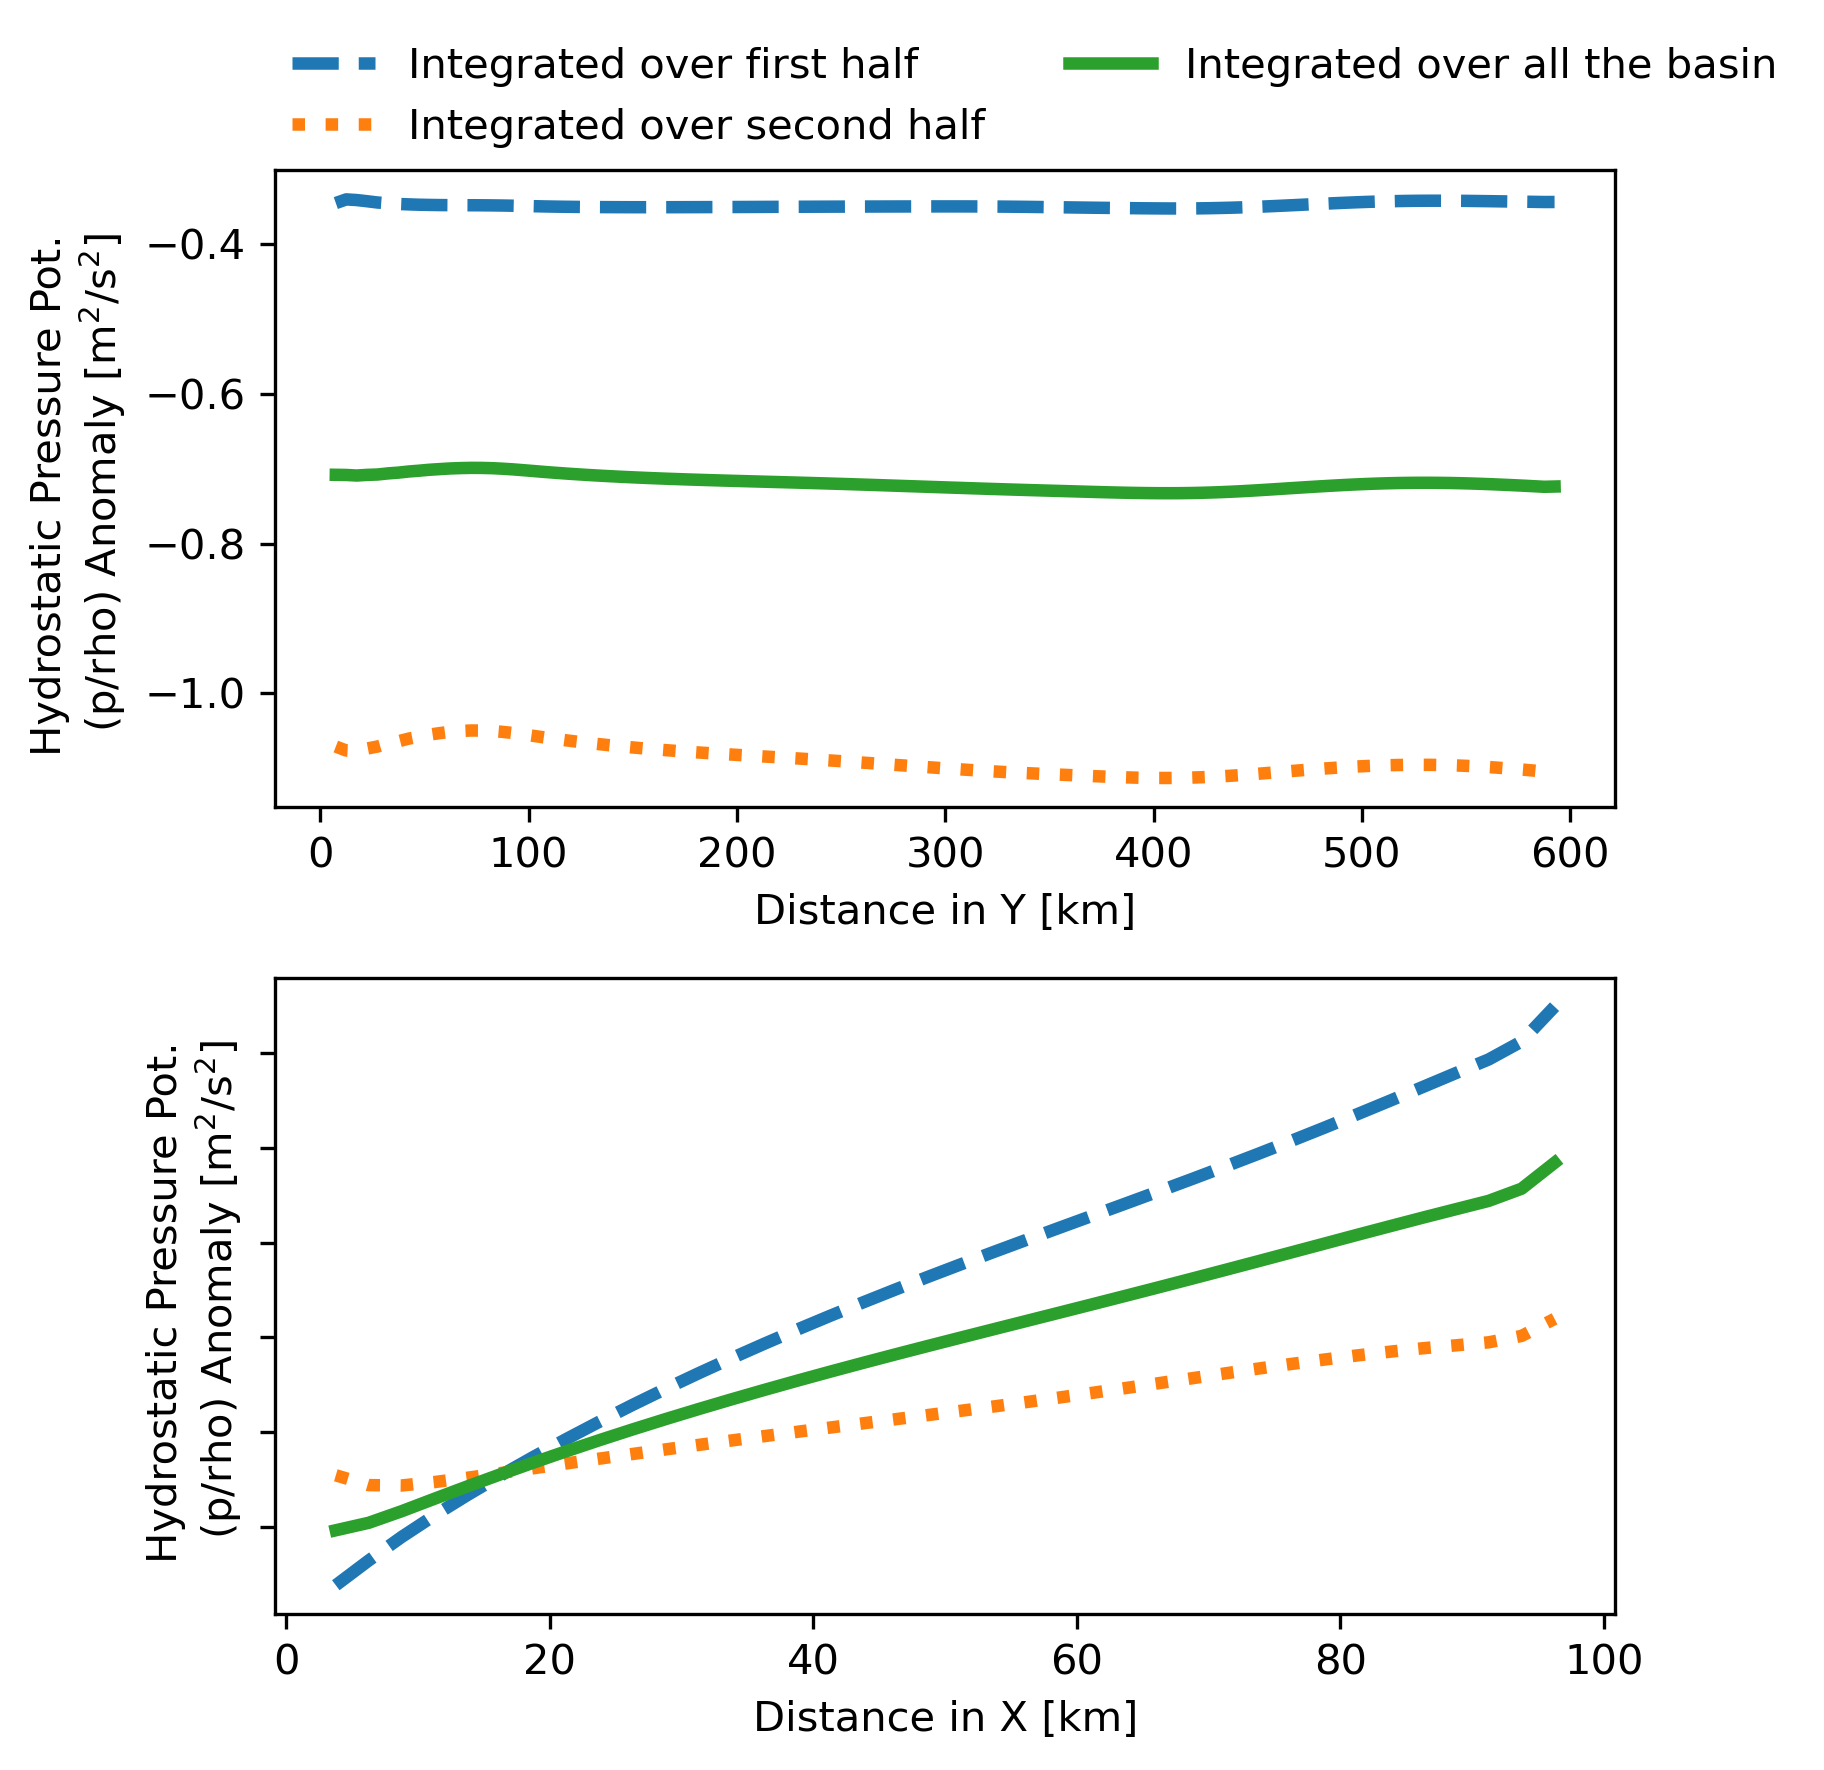

In [38]:
inarr=ds.PHIHYD[:,-1,:,:].values
fig,axin=plt.subplots(2)
ax=axin[0]
xlab= 'Hydrostatic Pressure Pot. \n (p/rho) Anomaly [m$^2$/s$^2$]'#'Meridional Transport of Density (kg/m$^2$/s)'

#ax.axvline(0,color='k',label='Zero')

ax.plot(ds.Y[1:-1]/1000,np.sum(inarr[-1,1:-1,1:10],axis=1)/(9),linestyle='dashed',linewidth=3,label='Integrated over first half')
ax.plot(ds.Y[1:-1]/1000,np.sum(inarr[-1,1:-1,10:-1],axis=1)/(9),linestyle='dotted',linewidth=3,label='Integrated over second half')
ax.plot(ds.Y[1:-1]/1000,np.sum(inarr[-1,1:-1,1:-1],axis=1)/(18), linewidth=3,label='Integrated over all the basin')
ax.set(xlabel='Distance in Y [km]',ylabel=xlab)



ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False)

ax=axin[1]
inarr=ds.PHIHYD[:,-1,:,:].values
xlab= 'Hydrostatic Pressure Pot. \n (p/rho) Anomaly [m$^2$/s$^2$]'#'Meridional Transport of Density (kg/m$^2$/s)'

#ax.axvline(0,color='k',label='Zero')

ax.plot(ds.X[1:-1]/1000,np.sum(inarr[-1,1:60,1:-1],axis=0)/(59),linestyle='dashed',linewidth=3,label='Integrated over X 0-50 km')
ax.plot(ds.X[1:-1]/1000,np.sum(inarr[-1,60:-1,1:-1],axis=0)/(59),linestyle='dotted',linewidth=3,label='Integrated over X 50-100 km')
ax.plot(ds.X[1:-1]/1000,np.sum(inarr[-1,1:-1,1:-1],axis=0)/(118), linewidth=3,label='Integrated over all X')
ax.set(xlabel='Distance in X [km]',ylabel=xlab)

ax.yaxis.set_tick_params(labelleft=False)

#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
 #           borderaxespad=0, frameon=False)

fig.tight_layout()
plt.savefig('../' + str(project)+'/Figures/' +str(ed)+ 'LastYearPHIHYD600m.png', bbox_inches='tight')

# Zonal crossection

In [39]:
params = {'font.size': 15,
          'figure.figsize': (20, 10),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

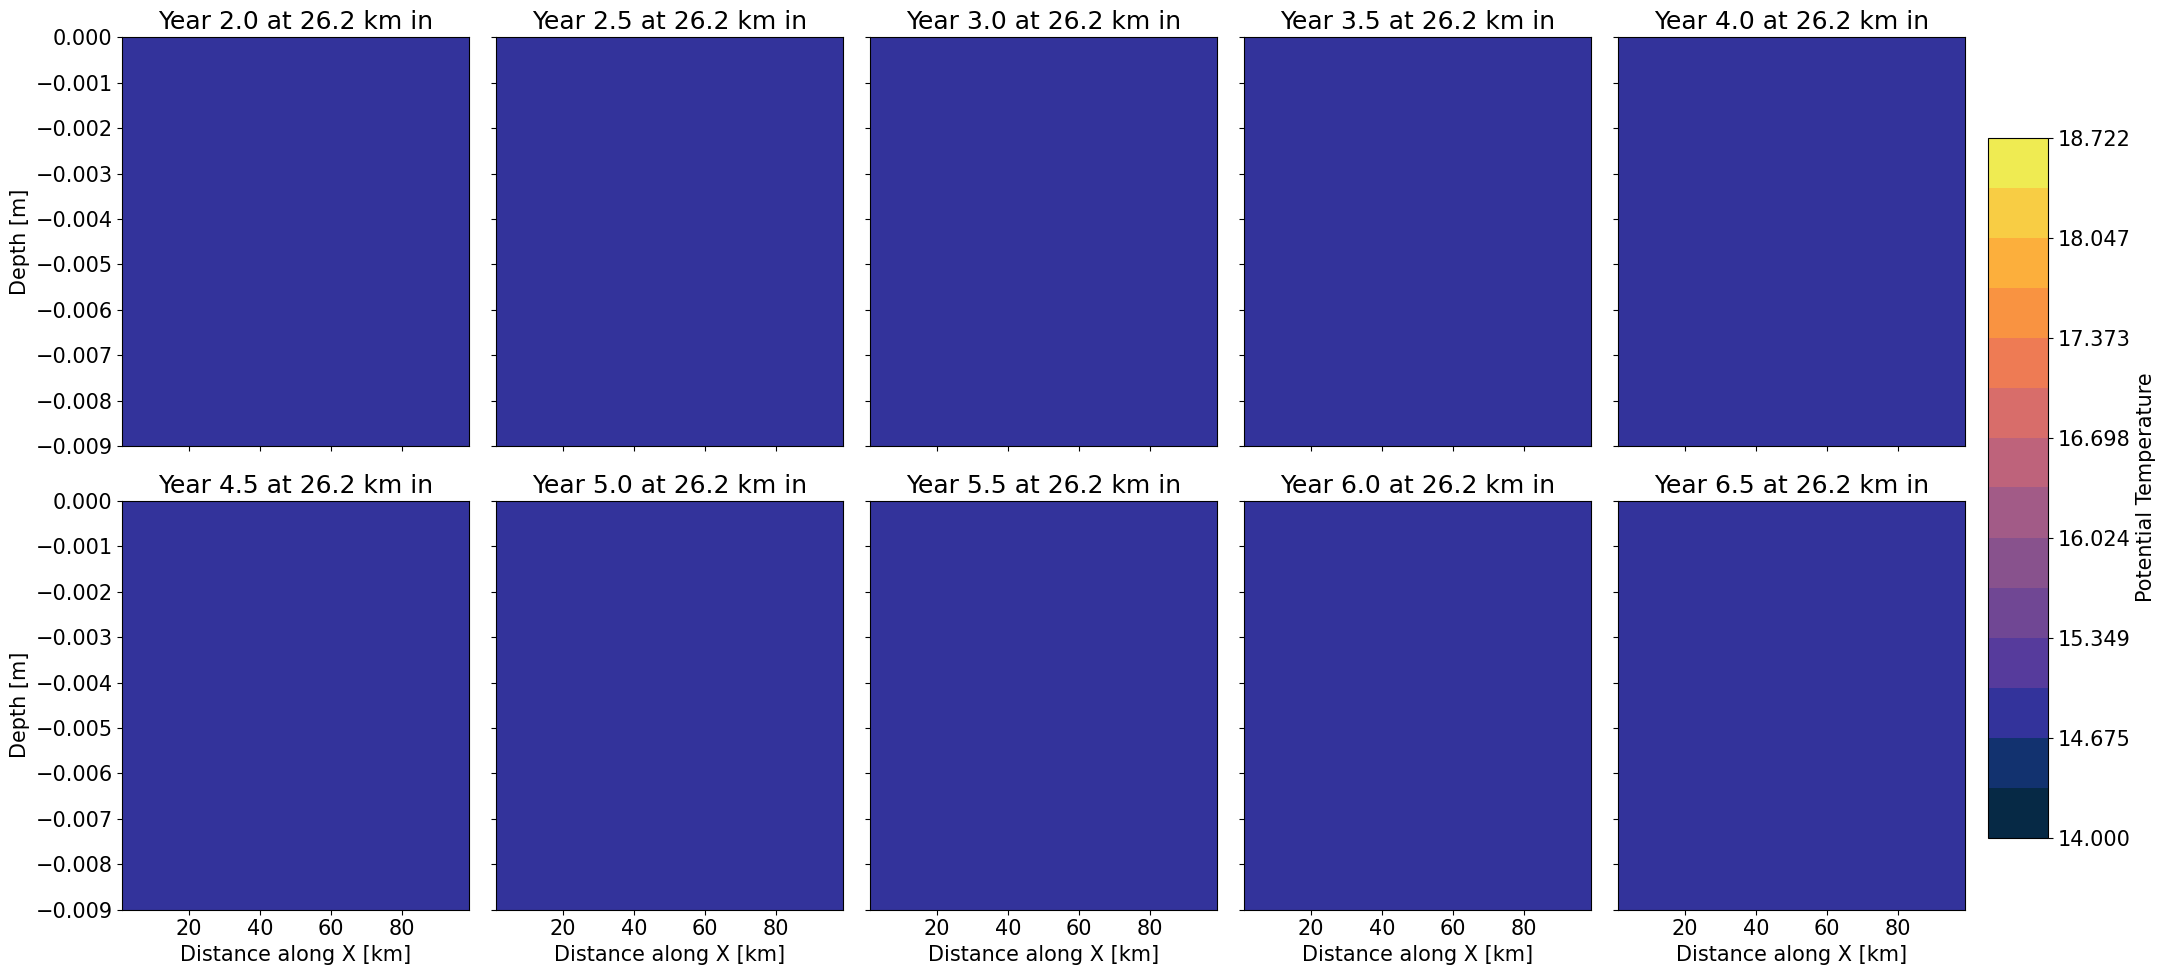

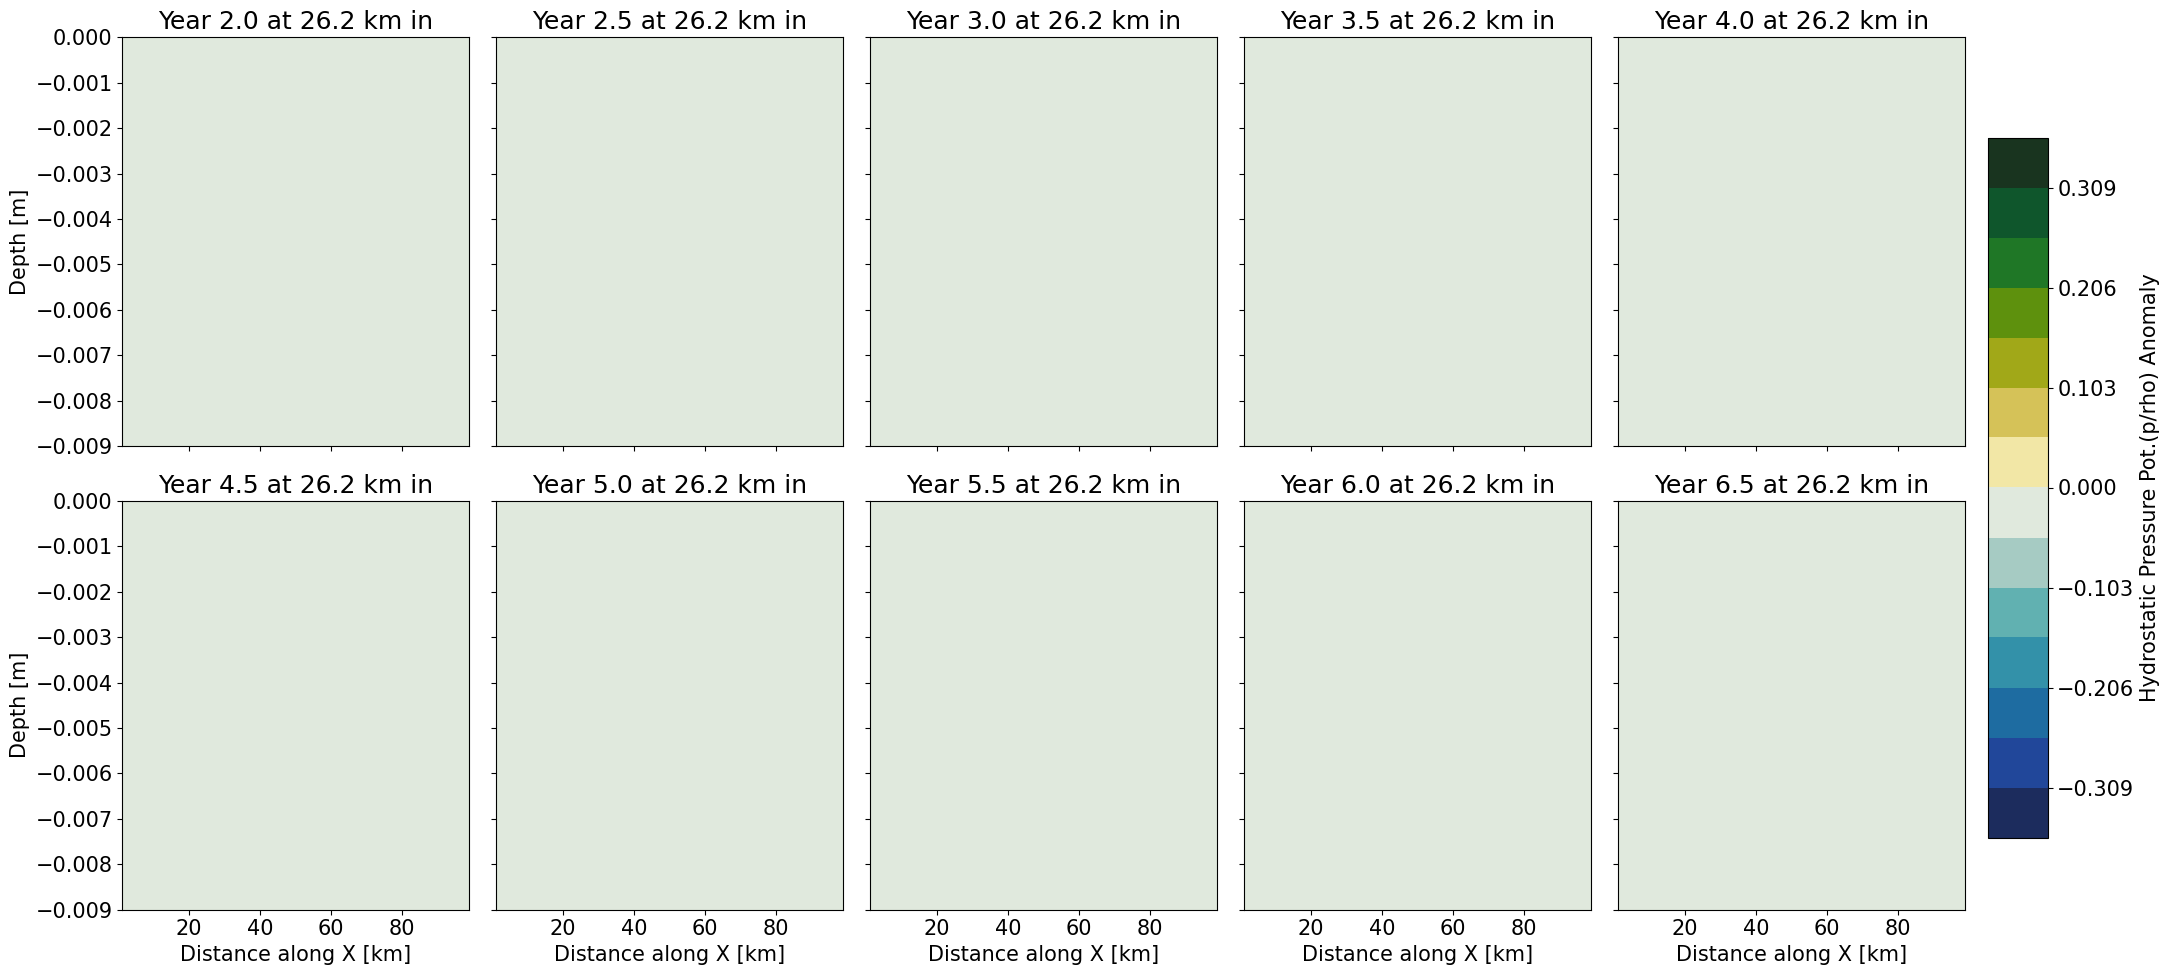

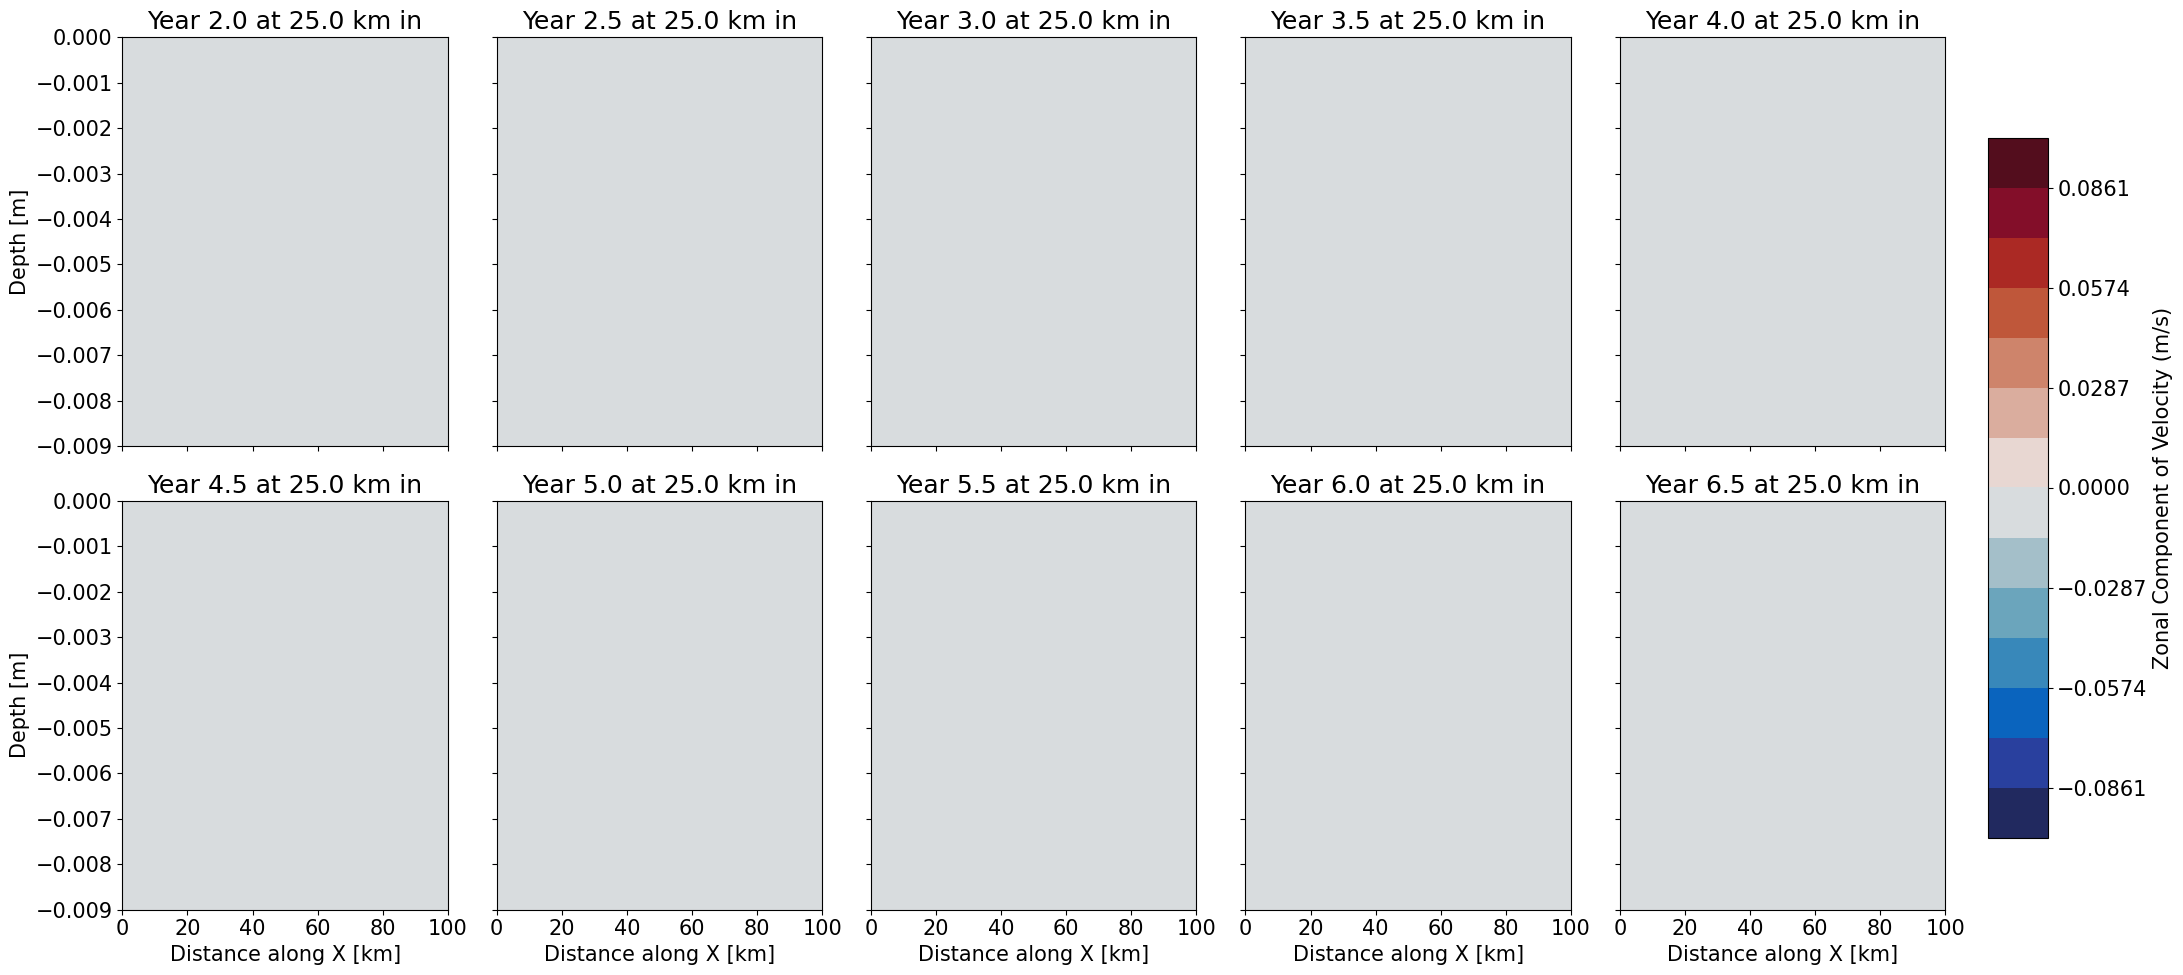

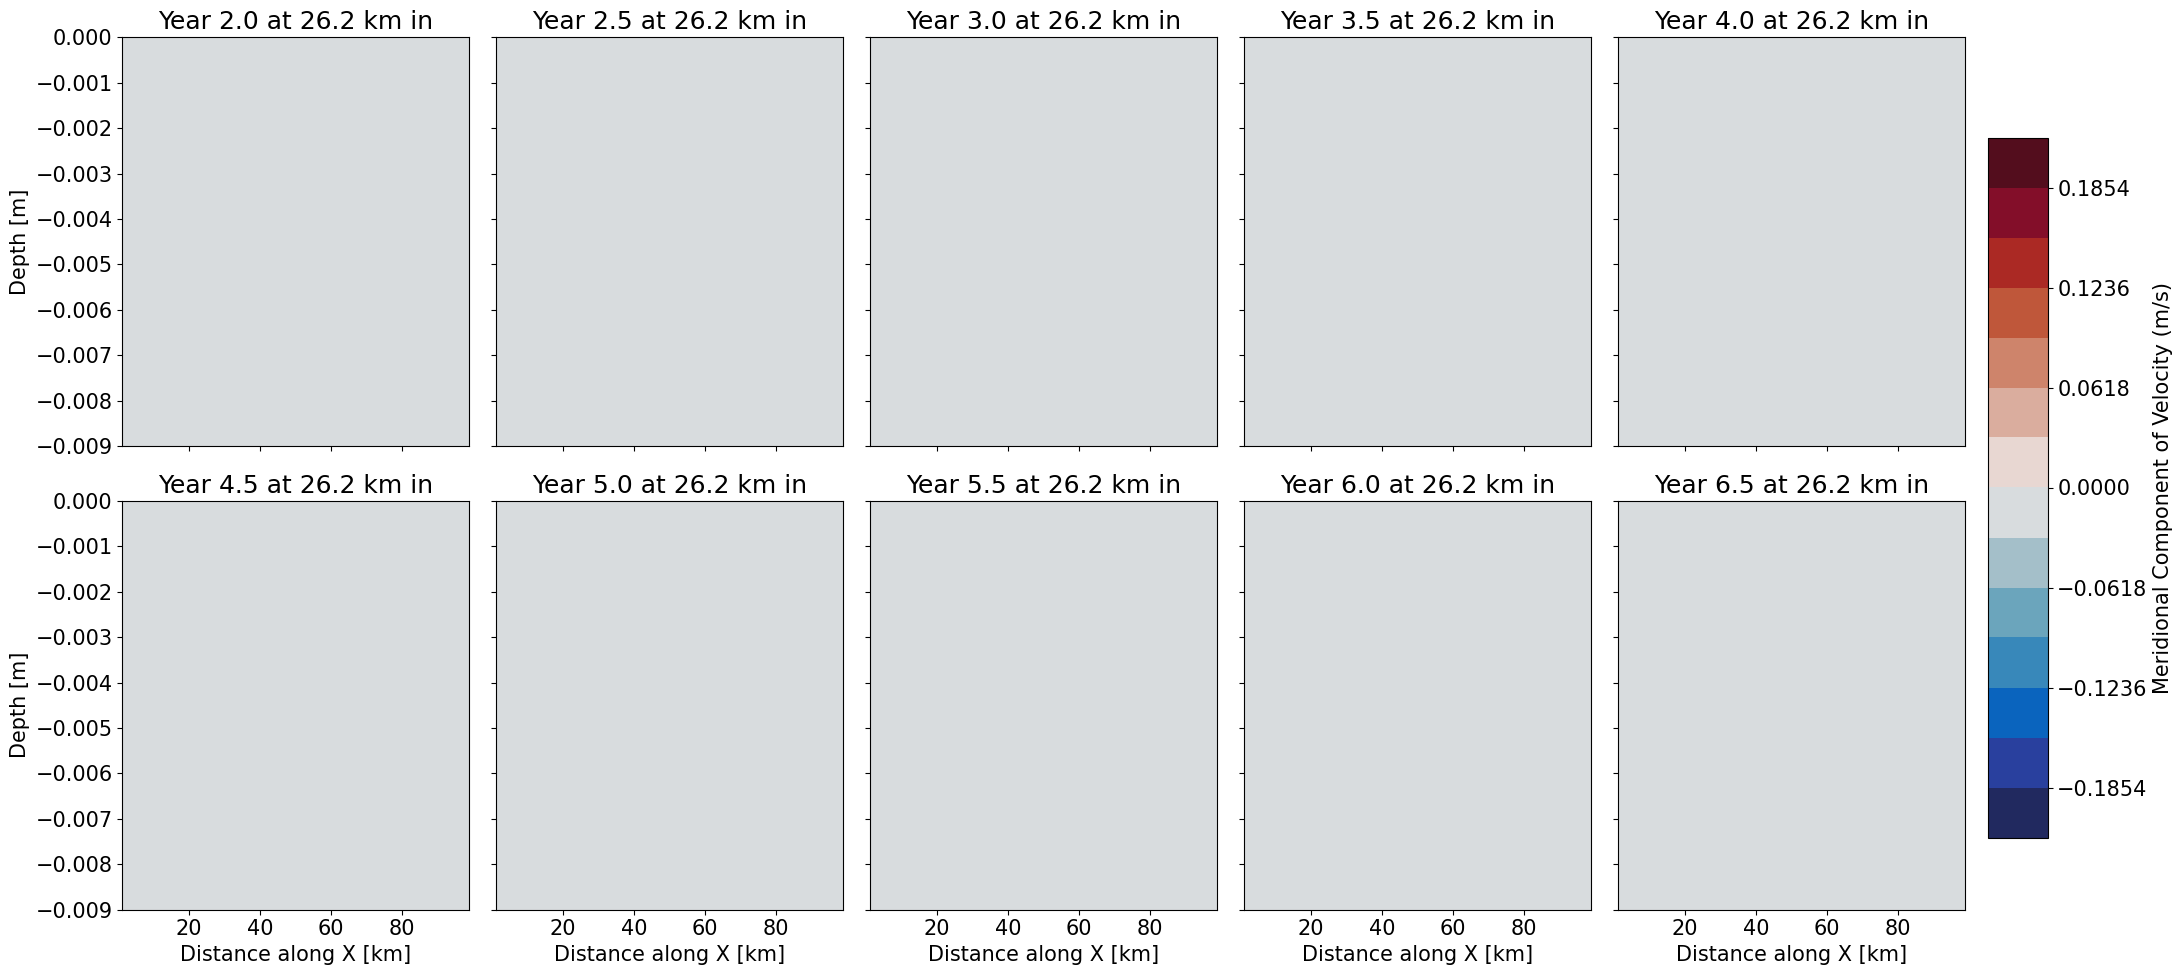

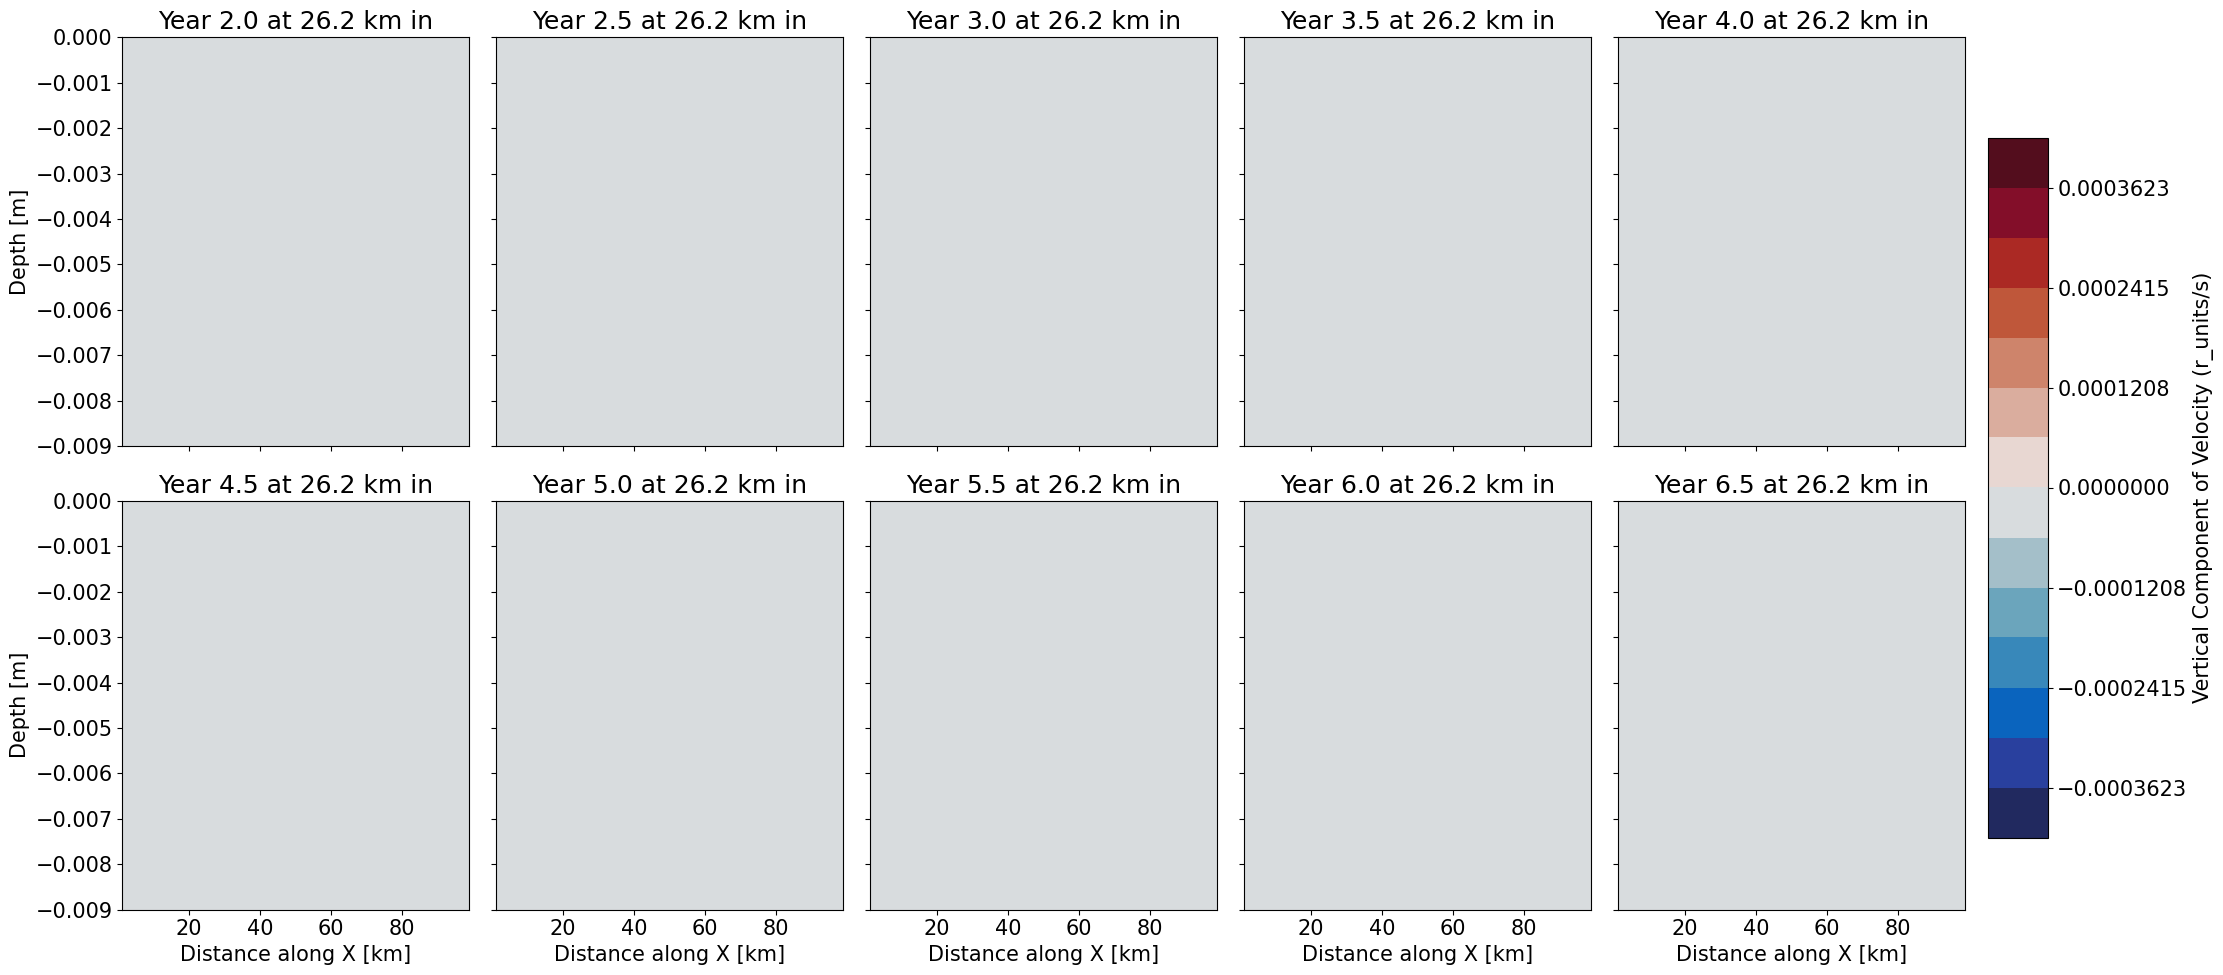

In [40]:
t=3

VARS=list(ds.keys())[2:-6]


for variable in VARS:

    exec(f'varin=ds.{variable}')
    title= varin.description 
    if variable == 'VVEL' or  variable == 'VRHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WV_VEL':
        Yin=ds.Yp1
    else:
        Yin=ds.Y
    if variable == 'UVEL' or  variable == 'URHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WU_VEL':
        Xin=ds.Xp1
    else:
        Xin=ds.X
    if variable == 'WU_VEL' or variable == 'WV_VEL' or  variable == 'WRHOMASS' or  variable == 'WVEL':
        Zin=-ds.Zld000010
    else:
        Zin=-ds.Zmd000010

    if variable == 'THETA':
        vmin=14
        vmax=np.max(varin)
        cmapi=cmocean.cm.thermal
    elif variable == 'PHIHYD':
        vmin=np.min(varin)
        vmax=-np.min(varin)
        cmapi=cmocean.cm.delta
    elif variable == 'WVEL' or variable == 'VRHOMASS'or  variable == 'WRHOMASS': 
        vmin=np.min(varin)/3
        vmax=-np.min(varin)/3
        cmapi=cmocean.cm.balance
    else: 
        vmin=np.min(varin)
        vmax=-np.min(varin)
        cmapi=cmocean.cm.balance

    levels=np.linspace(vmin,vmax,15)

    fig,ax=plt.subplots(2,5)

    for i in range(10):
        tin=t+(1*i)
        if i<=4:
            axin=ax[0,i]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>4,i<=9):
            axin=ax[1,i-5]
            axin.set(xlabel='Distance along X [km]')
        if i==0 or i==10 or i==5 :
            axin.set(ylabel='Depth [m]')
        else: 
            axin.yaxis.set_tick_params(labelleft=False)


        timein=ds.T[tin]/(60*60*24)
        cax0=axin.contourf(Xin/1000, Zin/1000 , varin[tin,:,0,:],levels=levels,cmap=cmapi) 
        axin.set(title=f'Year {timein/360:.1f} at {Xin[10]/1000:.1f} km in')
        #plt.colorbar(cax0)
        if variable == 'URHOMASS' or variable == 'VRHOMASS':
            axin.set_ylim((-4,0))

    cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
    fig.colorbar(cax0, cax=cbar_ax)
    cbar_ax.set_ylabel(title)

    fig.tight_layout()

    fig.patch.set_alpha(0.0)
    plt.savefig('../' + str(project)+'/Figures/' +str(ed) + str(variable) + 'zonal.png', bbox_inches='tight')

# Meridional crossection 

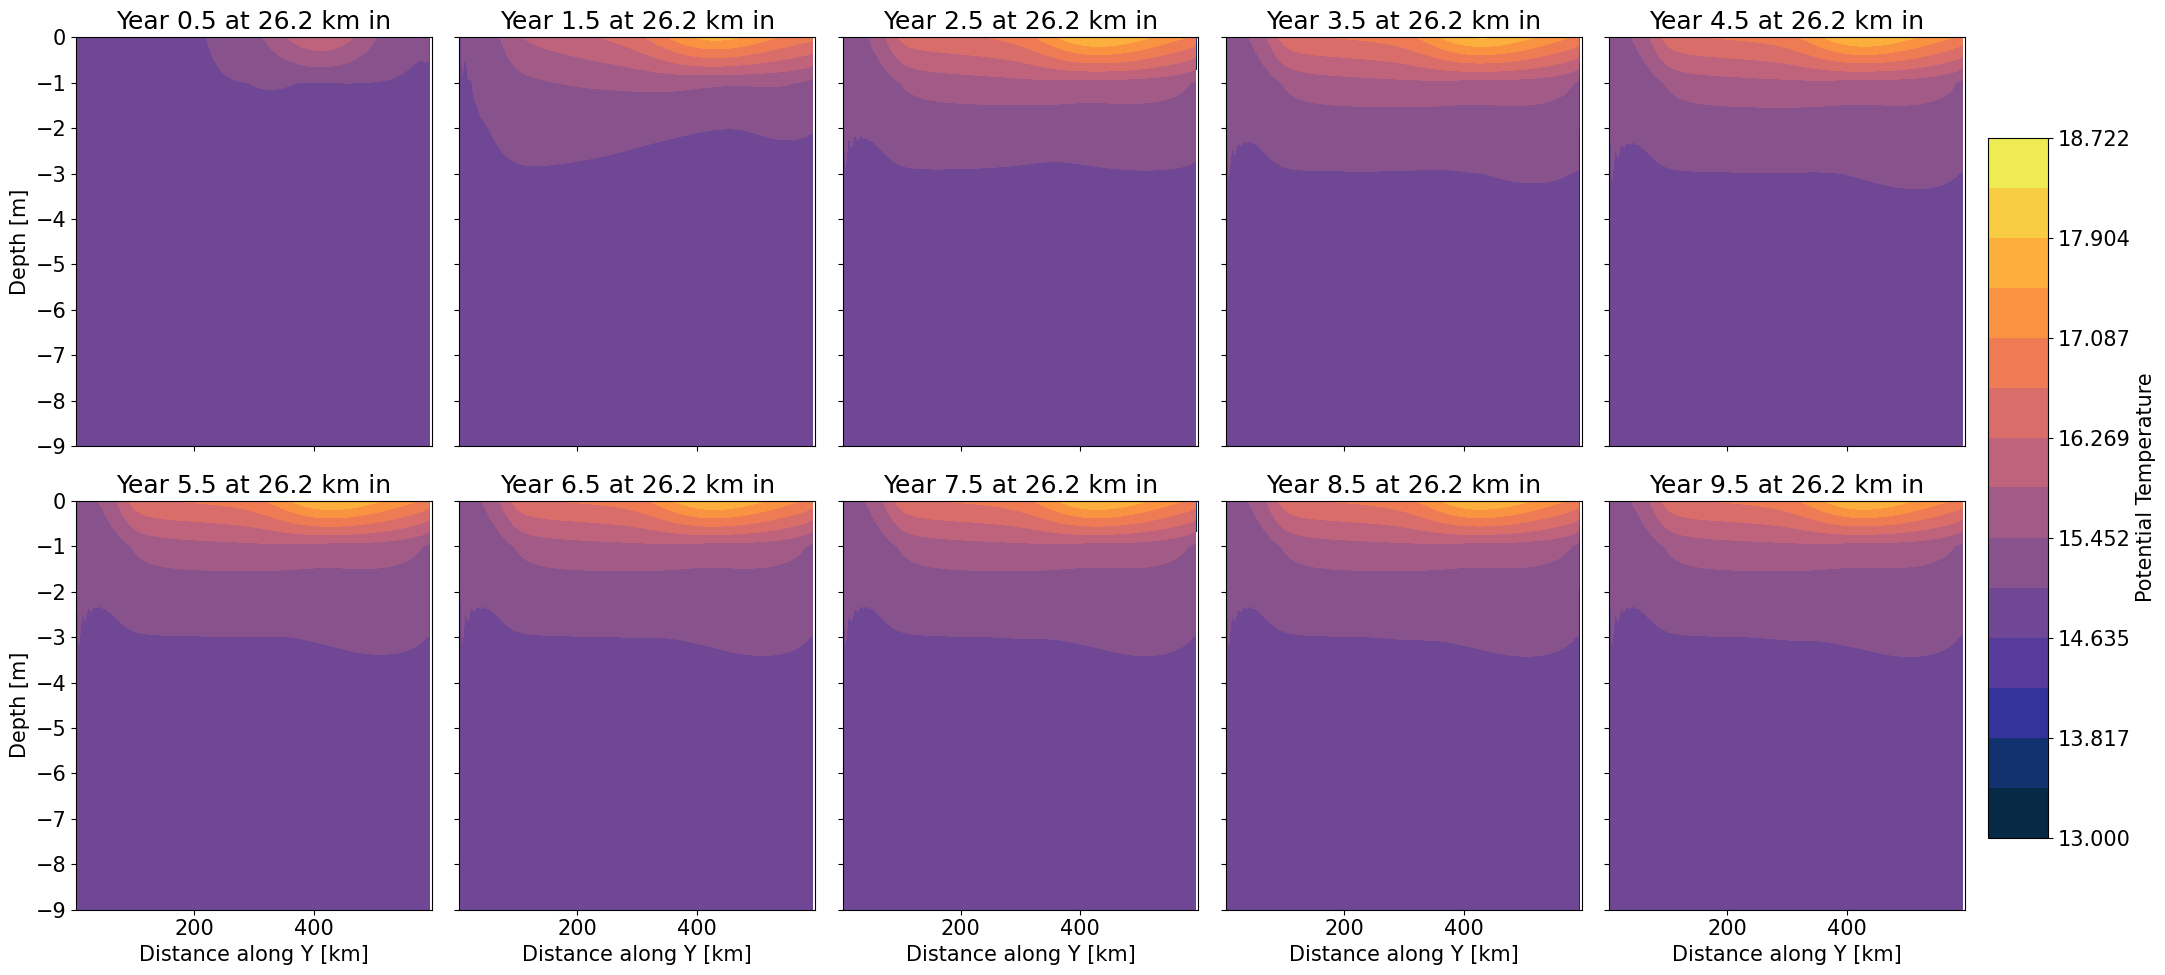

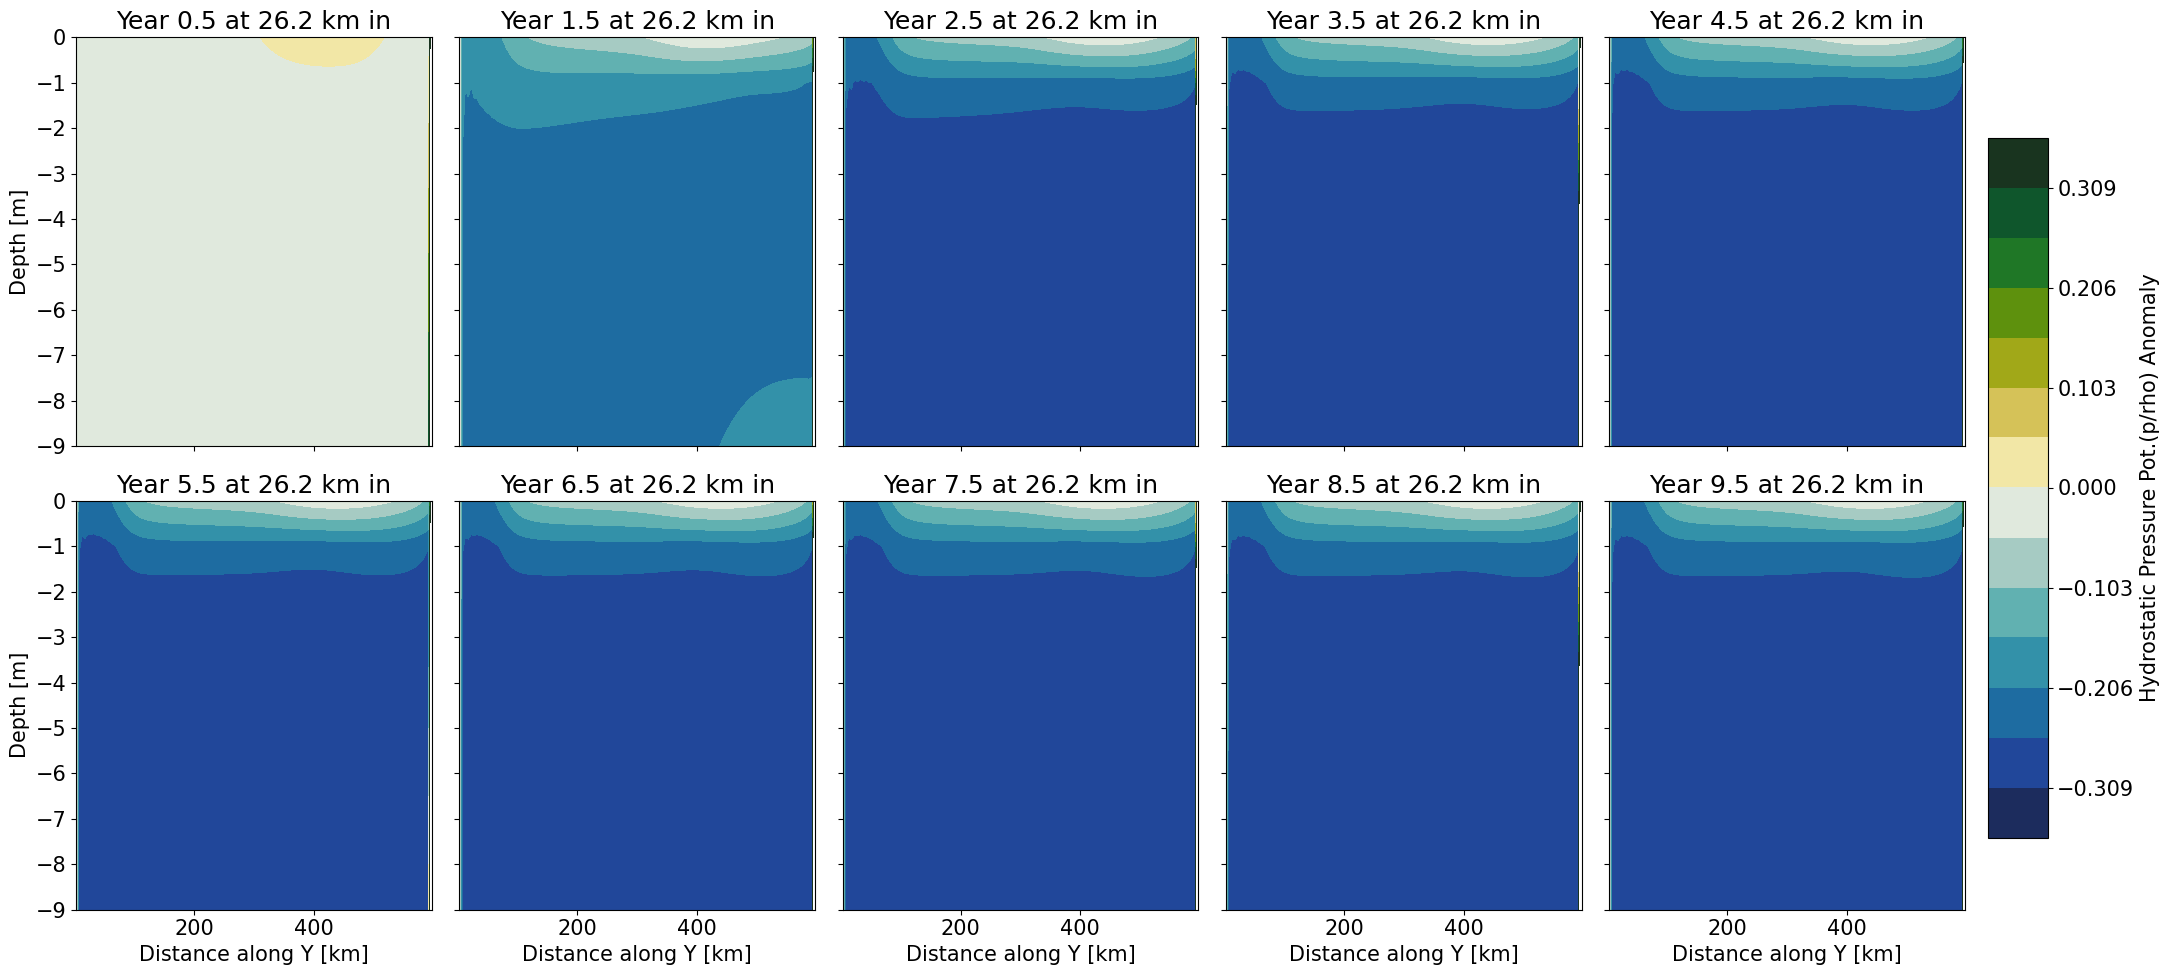

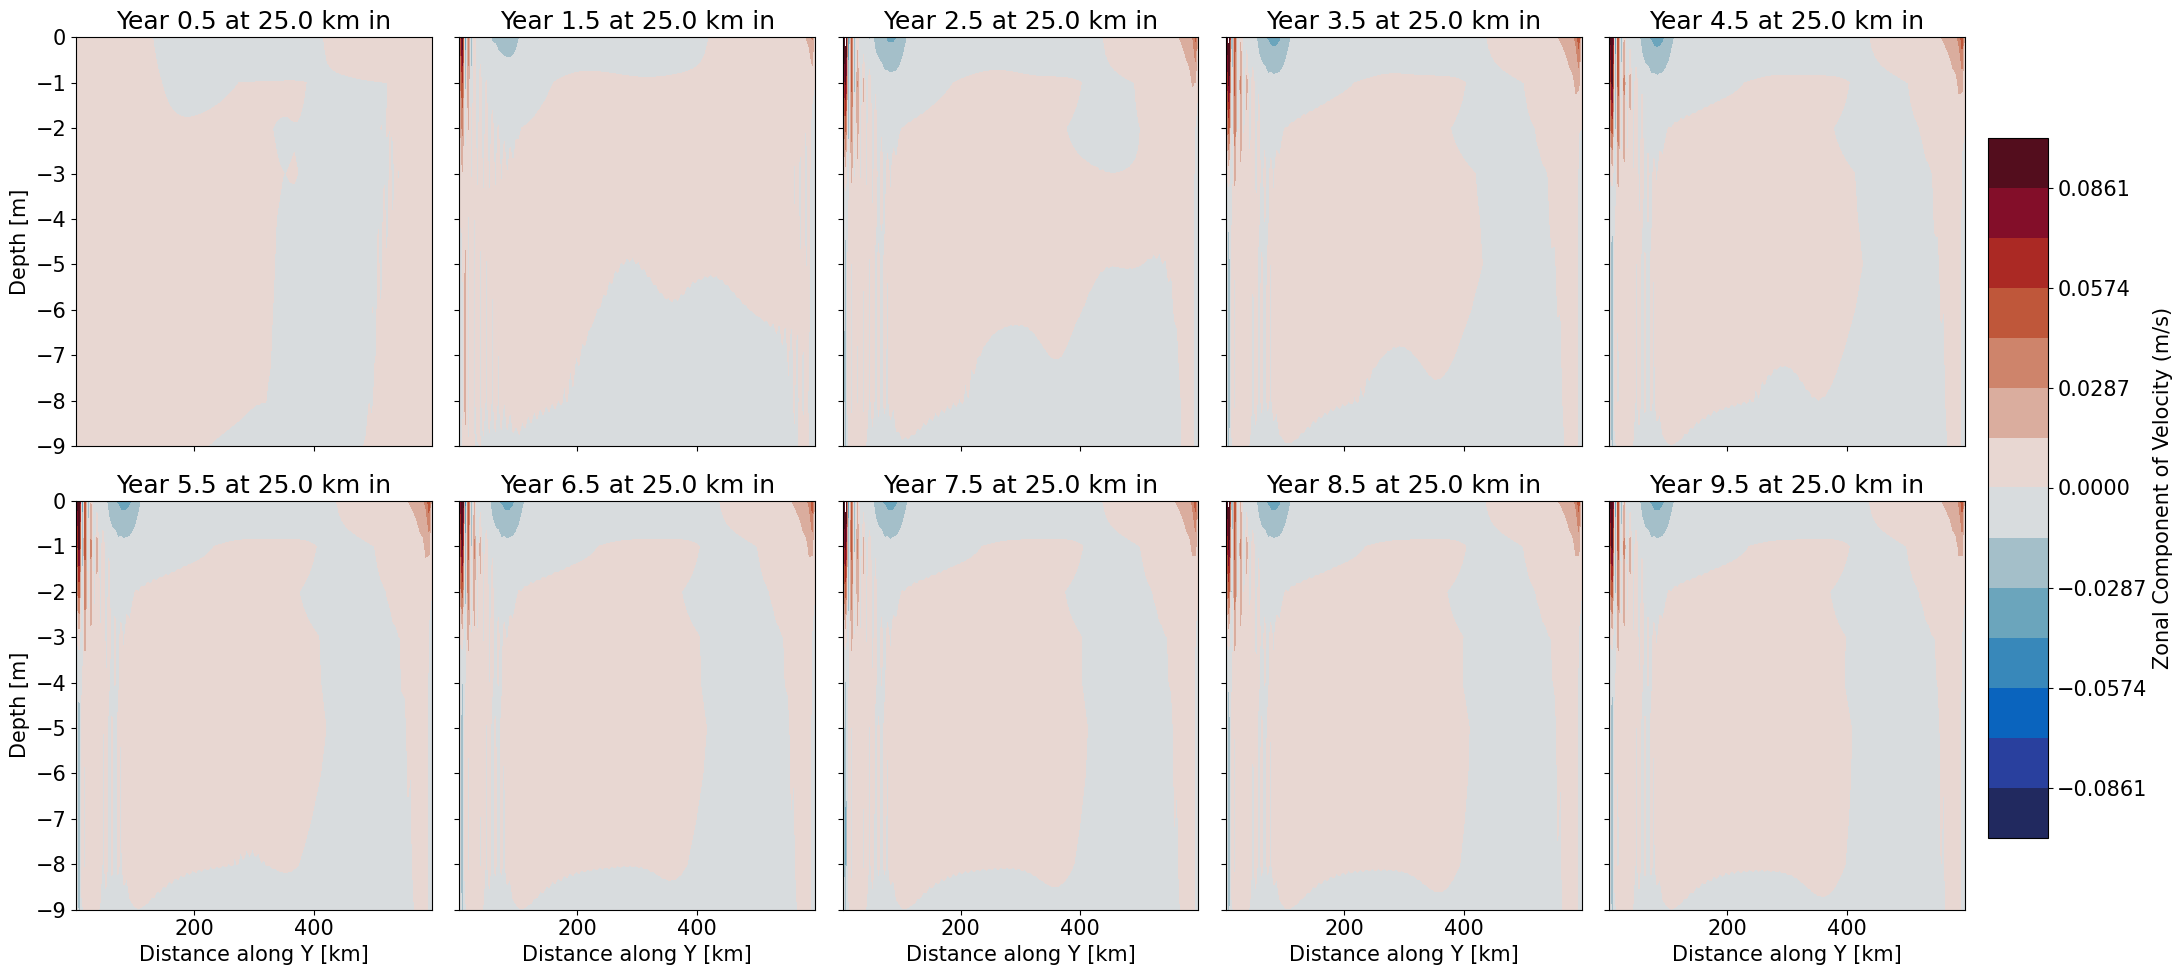

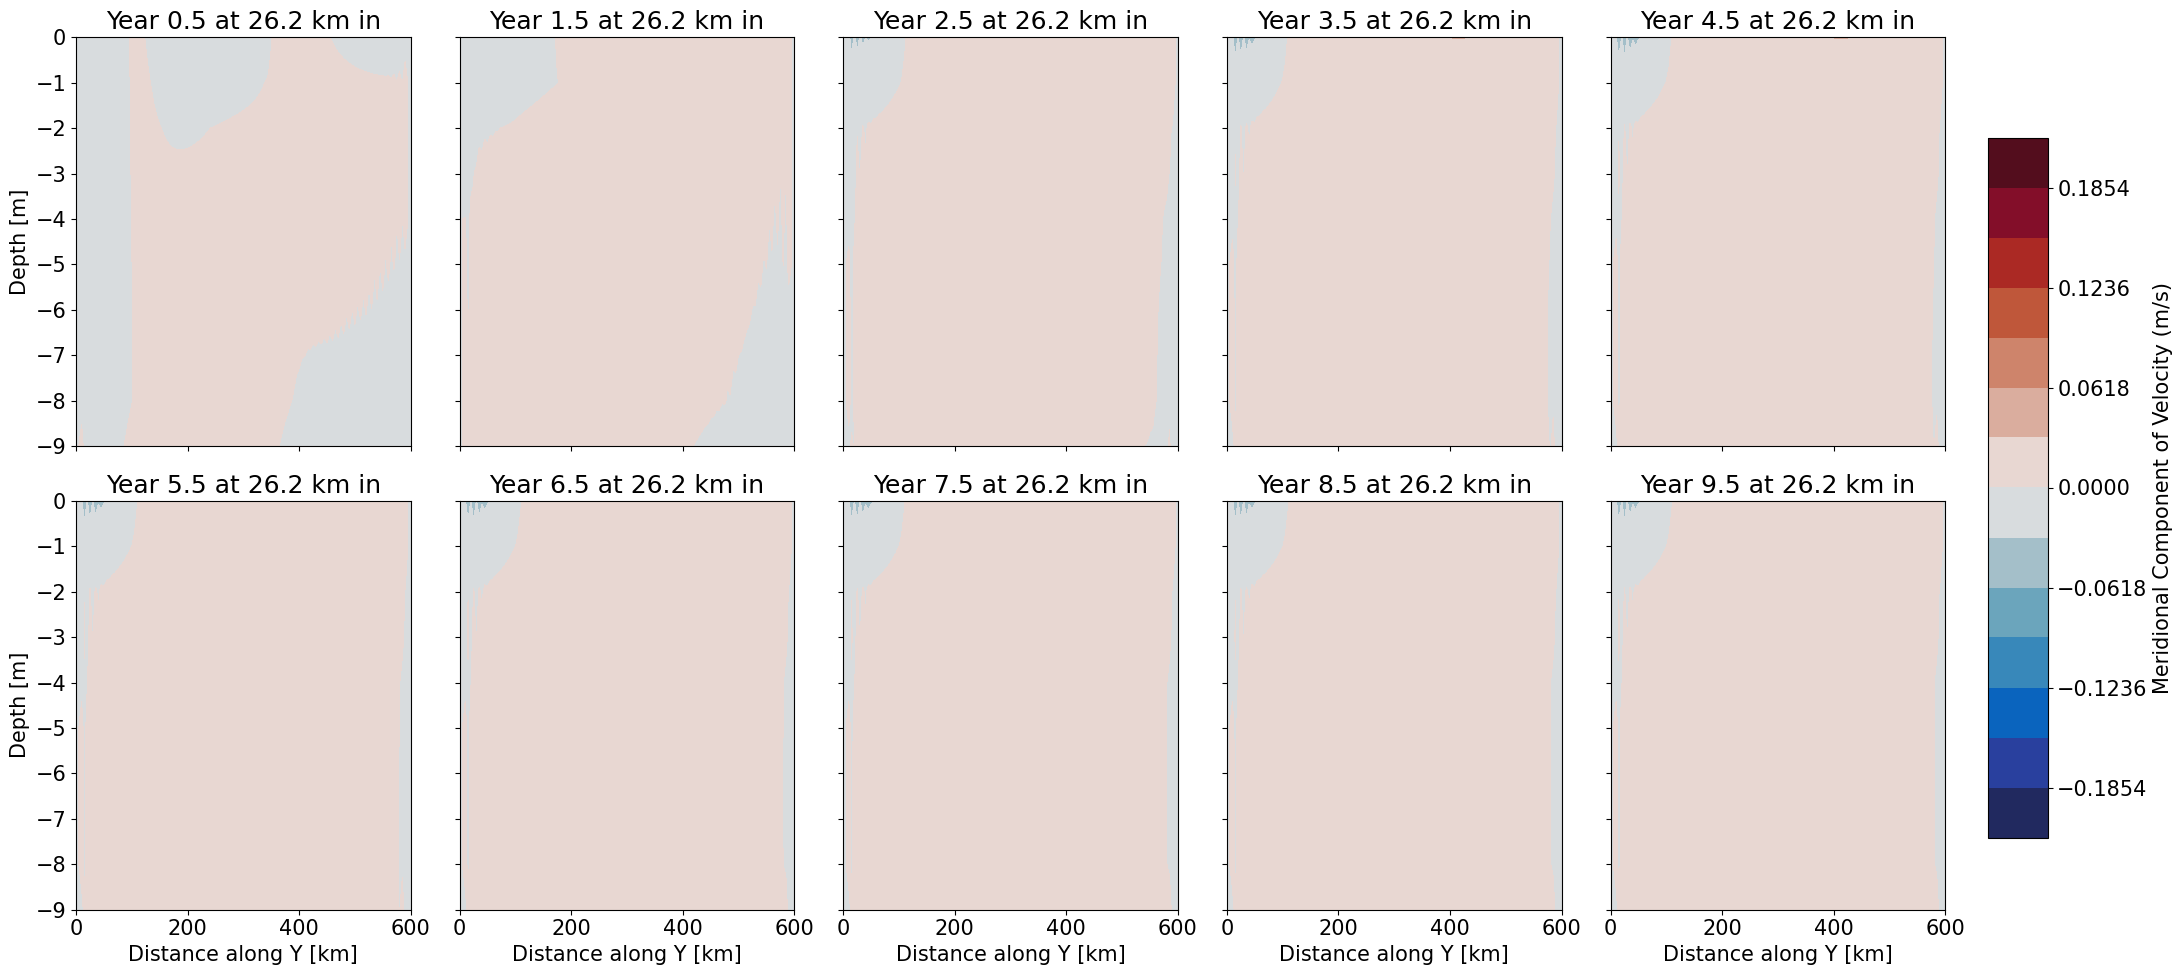

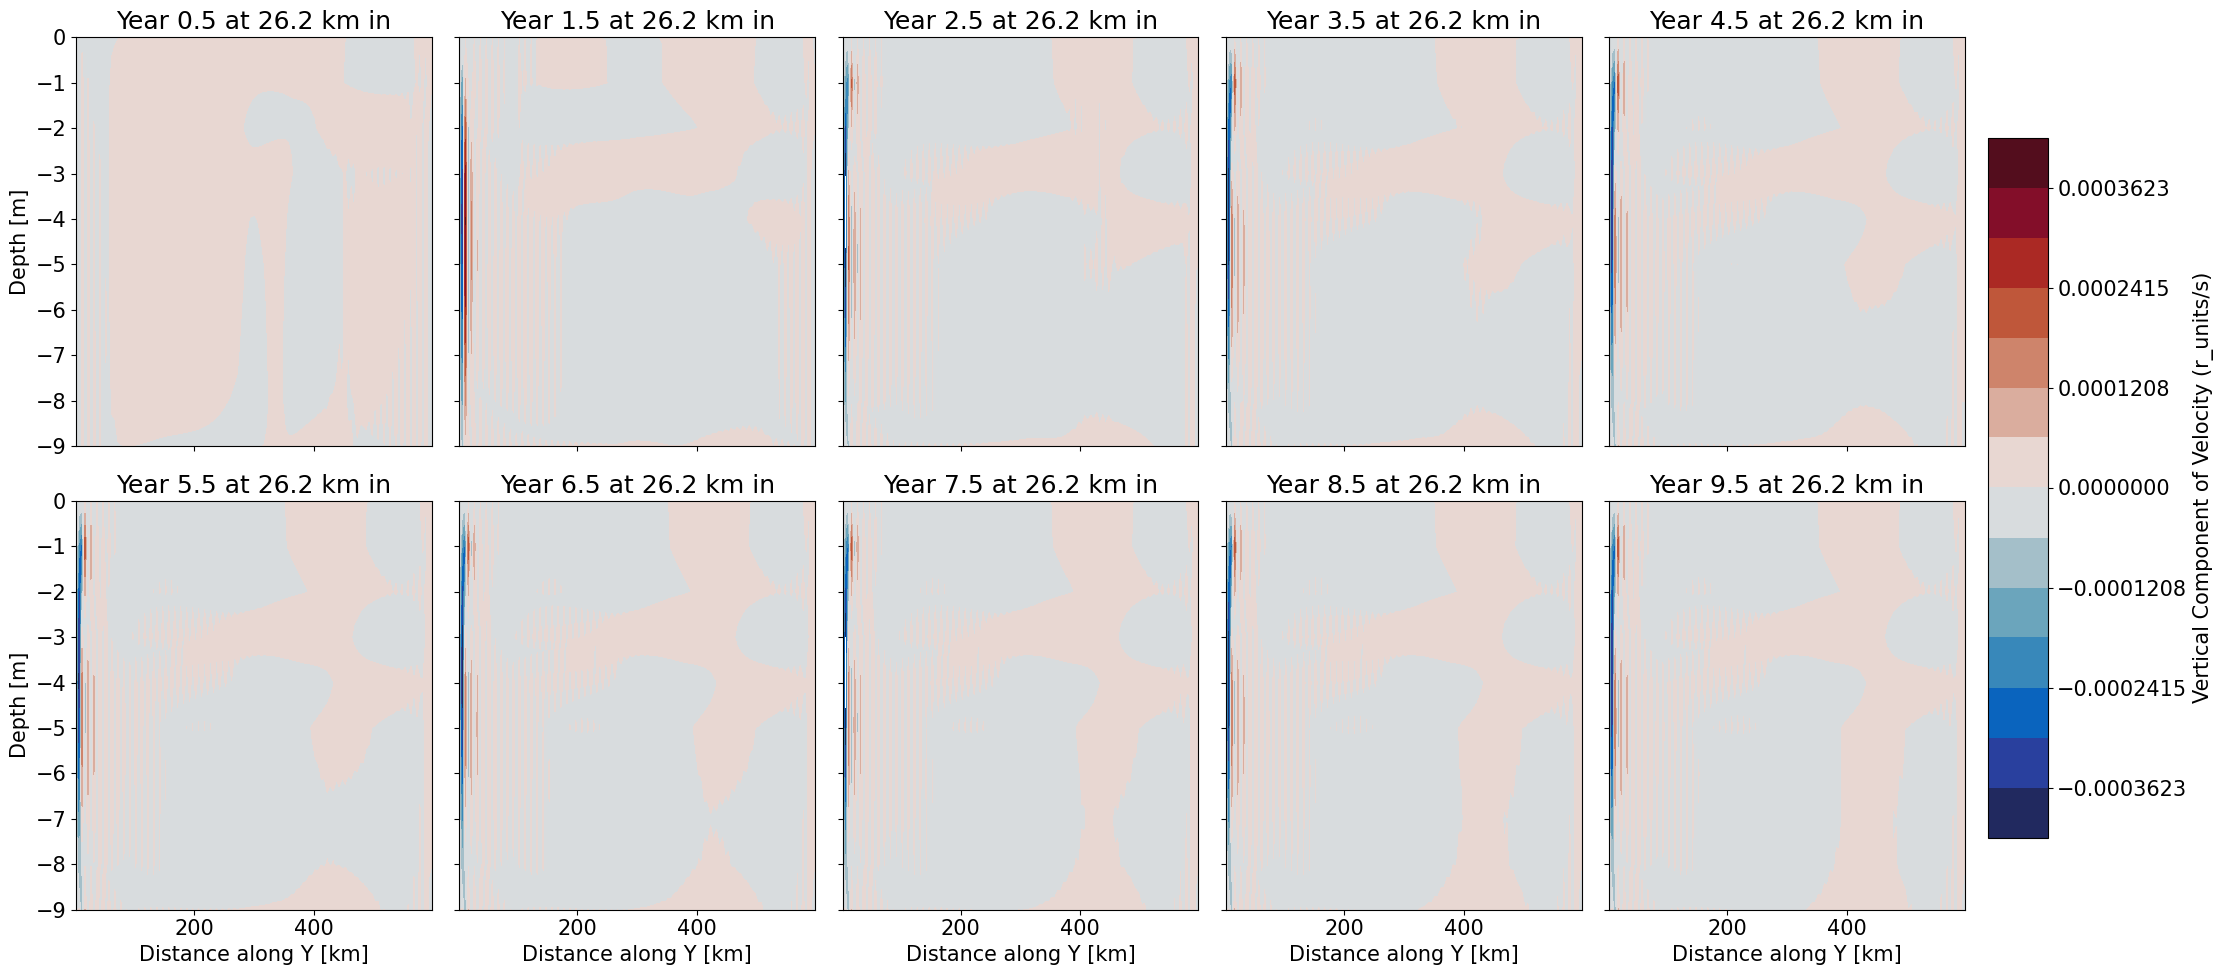

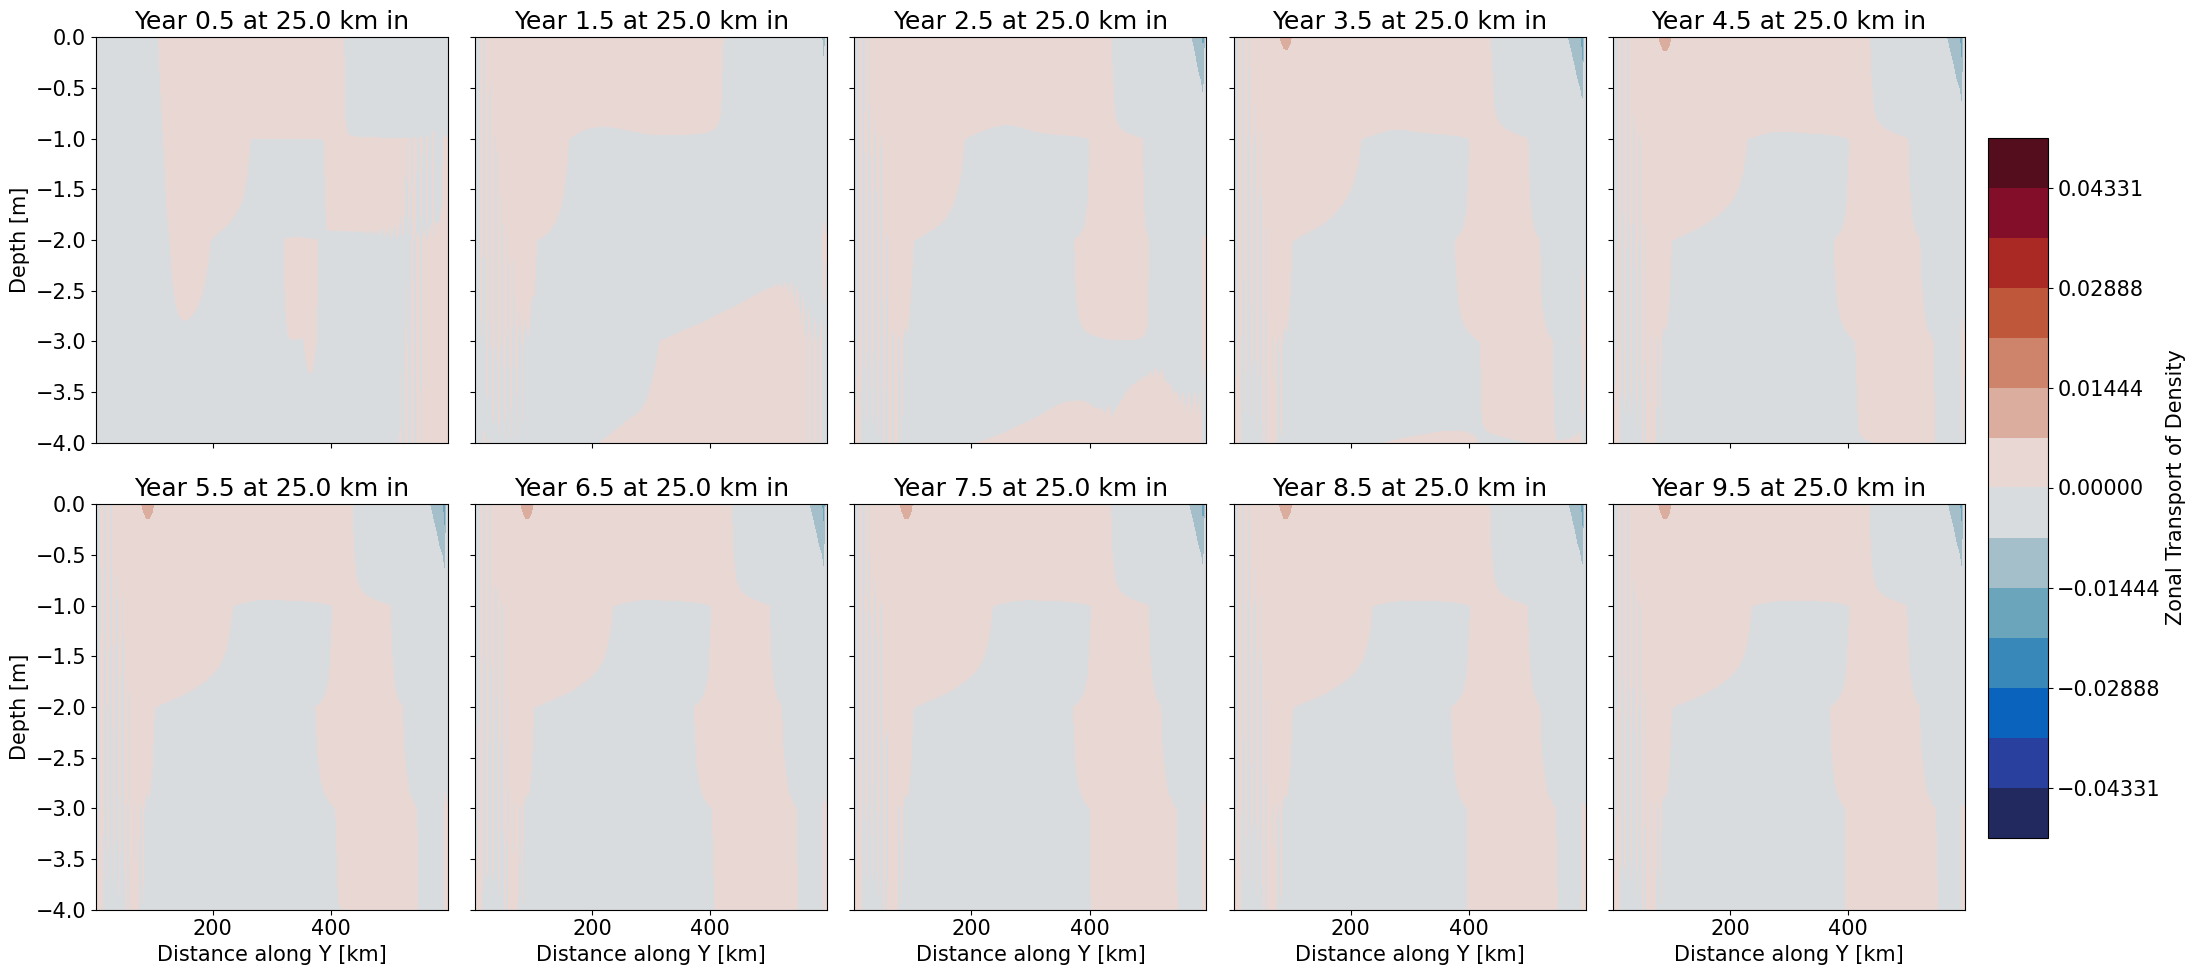

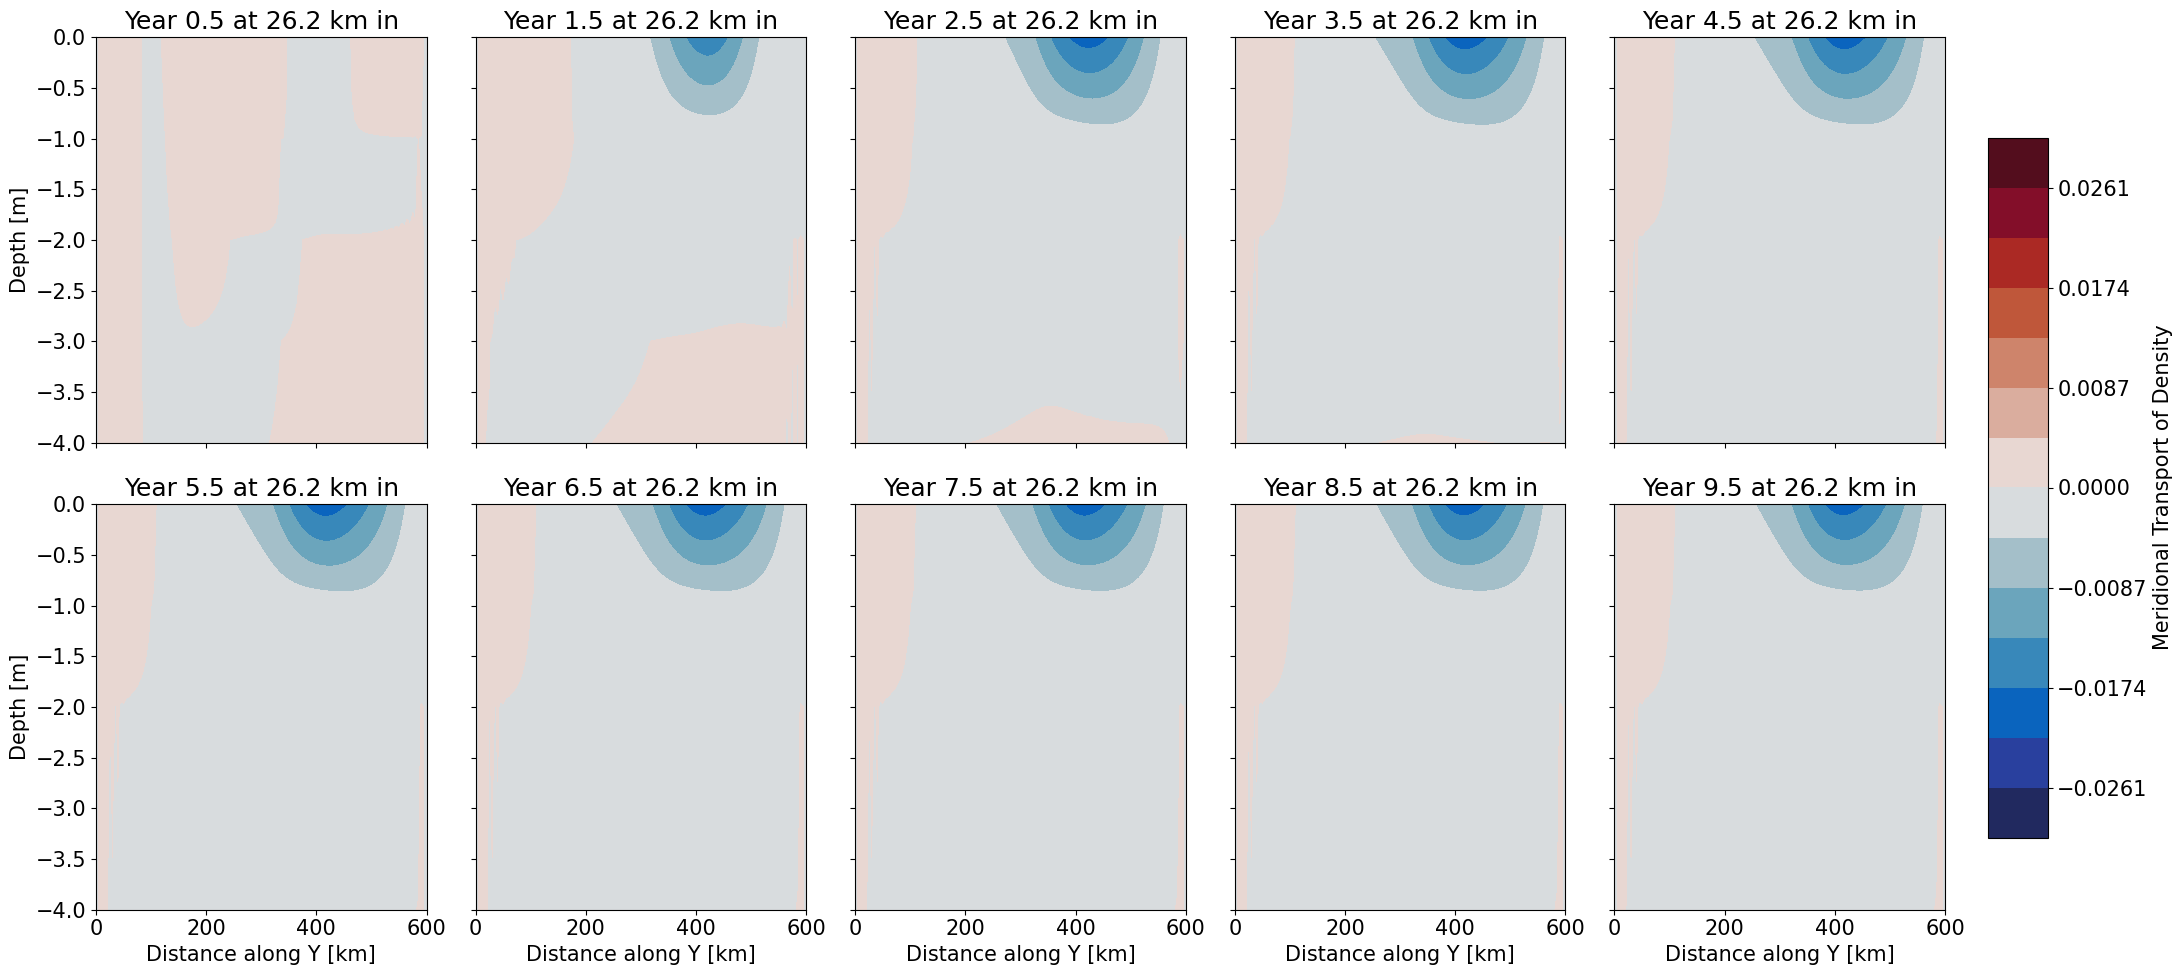

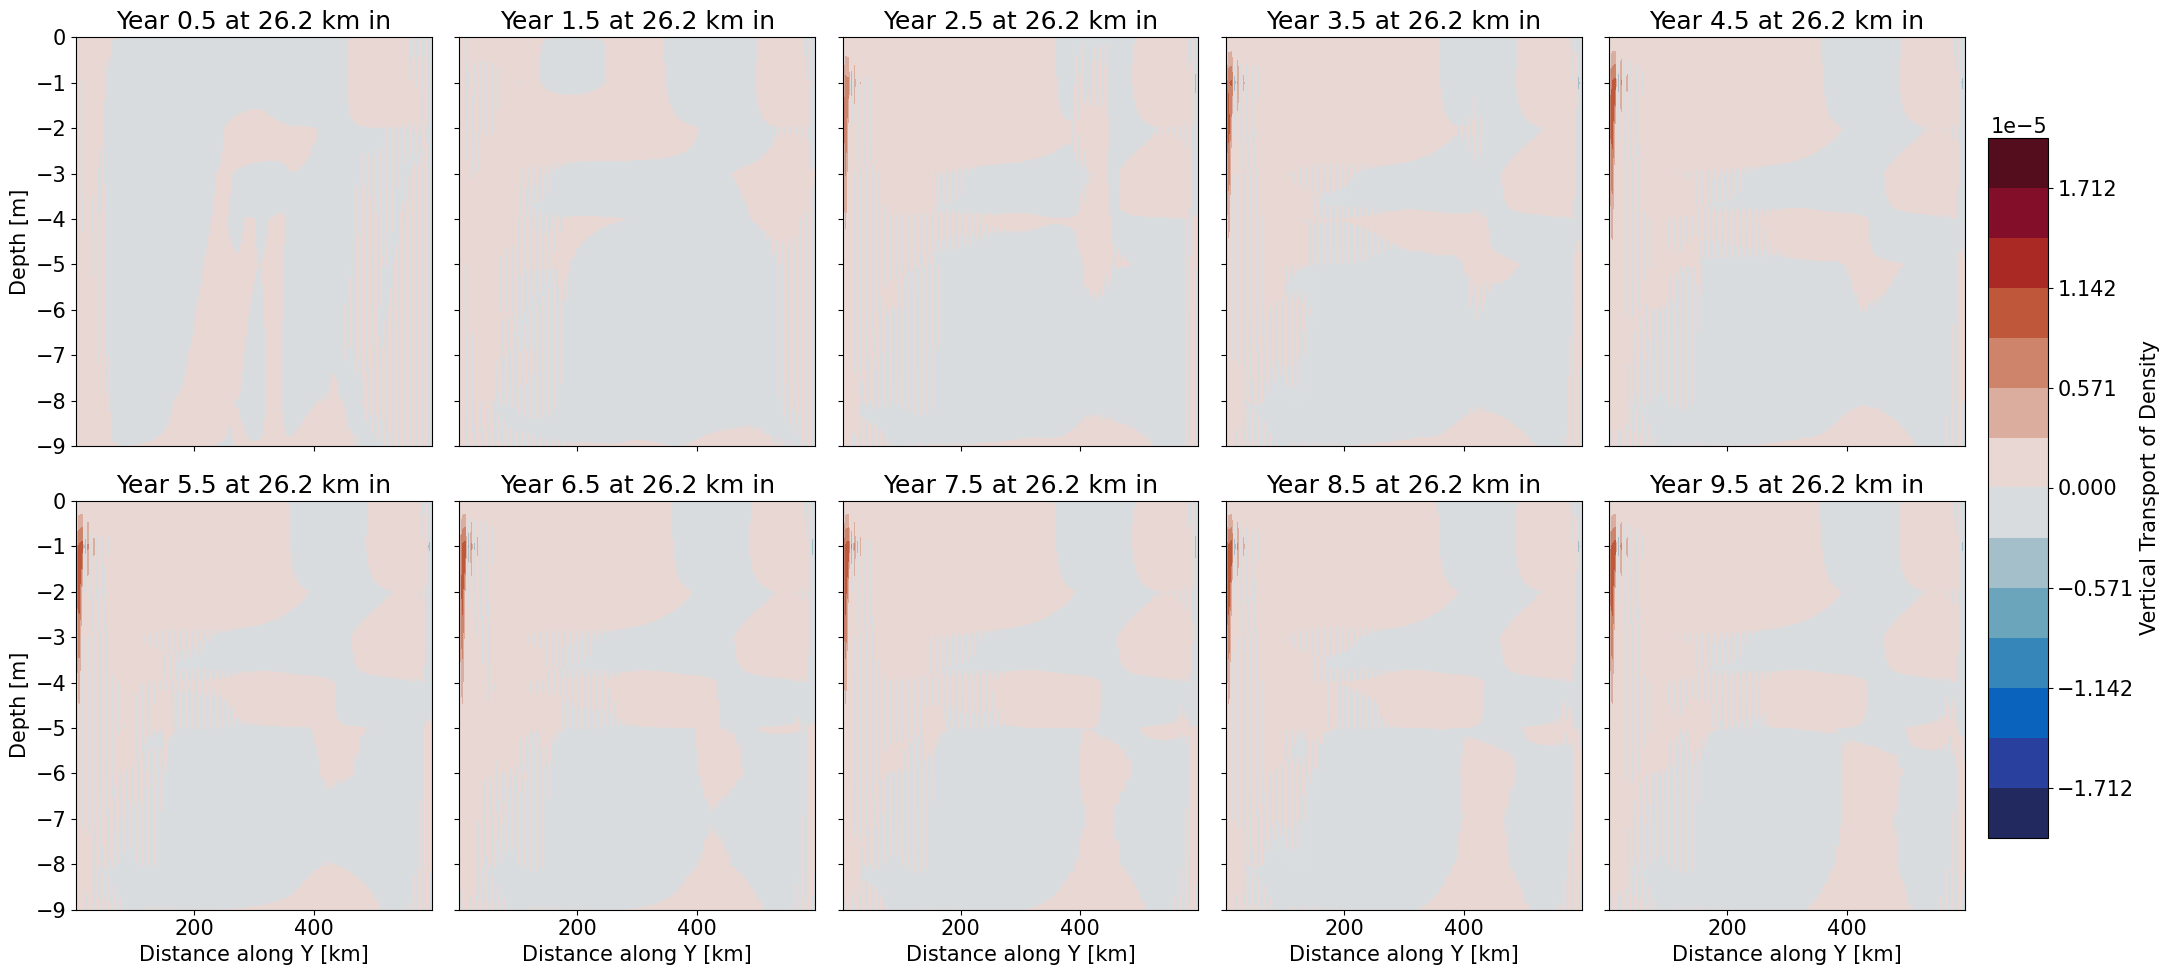

In [41]:
t=0

VARS=list(ds.keys())[2:-3]


for variable in VARS:

    exec(f'varin=ds.{variable}')
    title= varin.description 
    if variable == 'VVEL' or  variable == 'VRHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WV_VEL':
        Yin=ds.Yp1
    else:
        Yin=ds.Y
    if variable == 'UVEL' or  variable == 'URHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WU_VEL':
        Xin=ds.Xp1
    else:
        Xin=ds.X
    if variable == 'WU_VEL' or variable == 'WV_VEL' or  variable == 'WRHOMASS' or  variable == 'WVEL':
        Zin=-ds.Zld000010
    else:
        Zin=-ds.Zmd000010

    if variable == 'THETA':
        vmin=13
        vmax=np.max(varin)
        cmapi=cmocean.cm.thermal
    elif variable == 'PHIHYD':
        vmin=np.min(varin)
        vmax=-np.min(varin)
        cmapi=cmocean.cm.delta
    elif variable == 'WVEL' or variable == 'VRHOMASS'or  variable == 'WRHOMASS': 
        vmin=np.min(varin)/3
        vmax=-np.min(varin)/3
        cmapi=cmocean.cm.balance
    else: 
        vmin=np.min(varin)
        vmax=-np.min(varin)
        cmapi=cmocean.cm.balance

    levels=np.linspace(vmin,vmax,15)

    fig,ax=plt.subplots(2,5)

    for i in range(10):
        tin=t+(2*i)
        if i<=4:
            axin=ax[0,i]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>4,i<=9):
            axin=ax[1,i-5]
            axin.set(xlabel='Distance along Y [km]')
            
        if i==0 or i==10 or i==5 :
            axin.set(ylabel='Depth [m]')
        else: 
            axin.yaxis.set_tick_params(labelleft=False)


        timein=ds.T[tin]/(60*60*24)
        cax0=axin.contourf(Yin/1000, Zin , varin[tin,:,:,10],levels=levels,cmap=cmapi) 
        axin.set(title=f'Year {timein/360:.1f} at {Xin[10]/1000:.1f} km in')
        #plt.colorbar(cax0)
        if variable == 'URHOMASS' or variable == 'VRHOMASS':
            axin.set_ylim((-4,0))

    cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
    fig.colorbar(cax0, cax=cbar_ax)
    cbar_ax.set_ylabel(title)

    fig.tight_layout()

    fig.patch.set_alpha(0.0)
    plt.savefig('../' + str(project)+'/Figures/' + str(ed)+ str(variable) + 'meridional.png', bbox_inches='tight')

# OVERVIEW SURFACE

In [42]:
params = {'font.size': 15,
          'figure.figsize': (20, 20),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

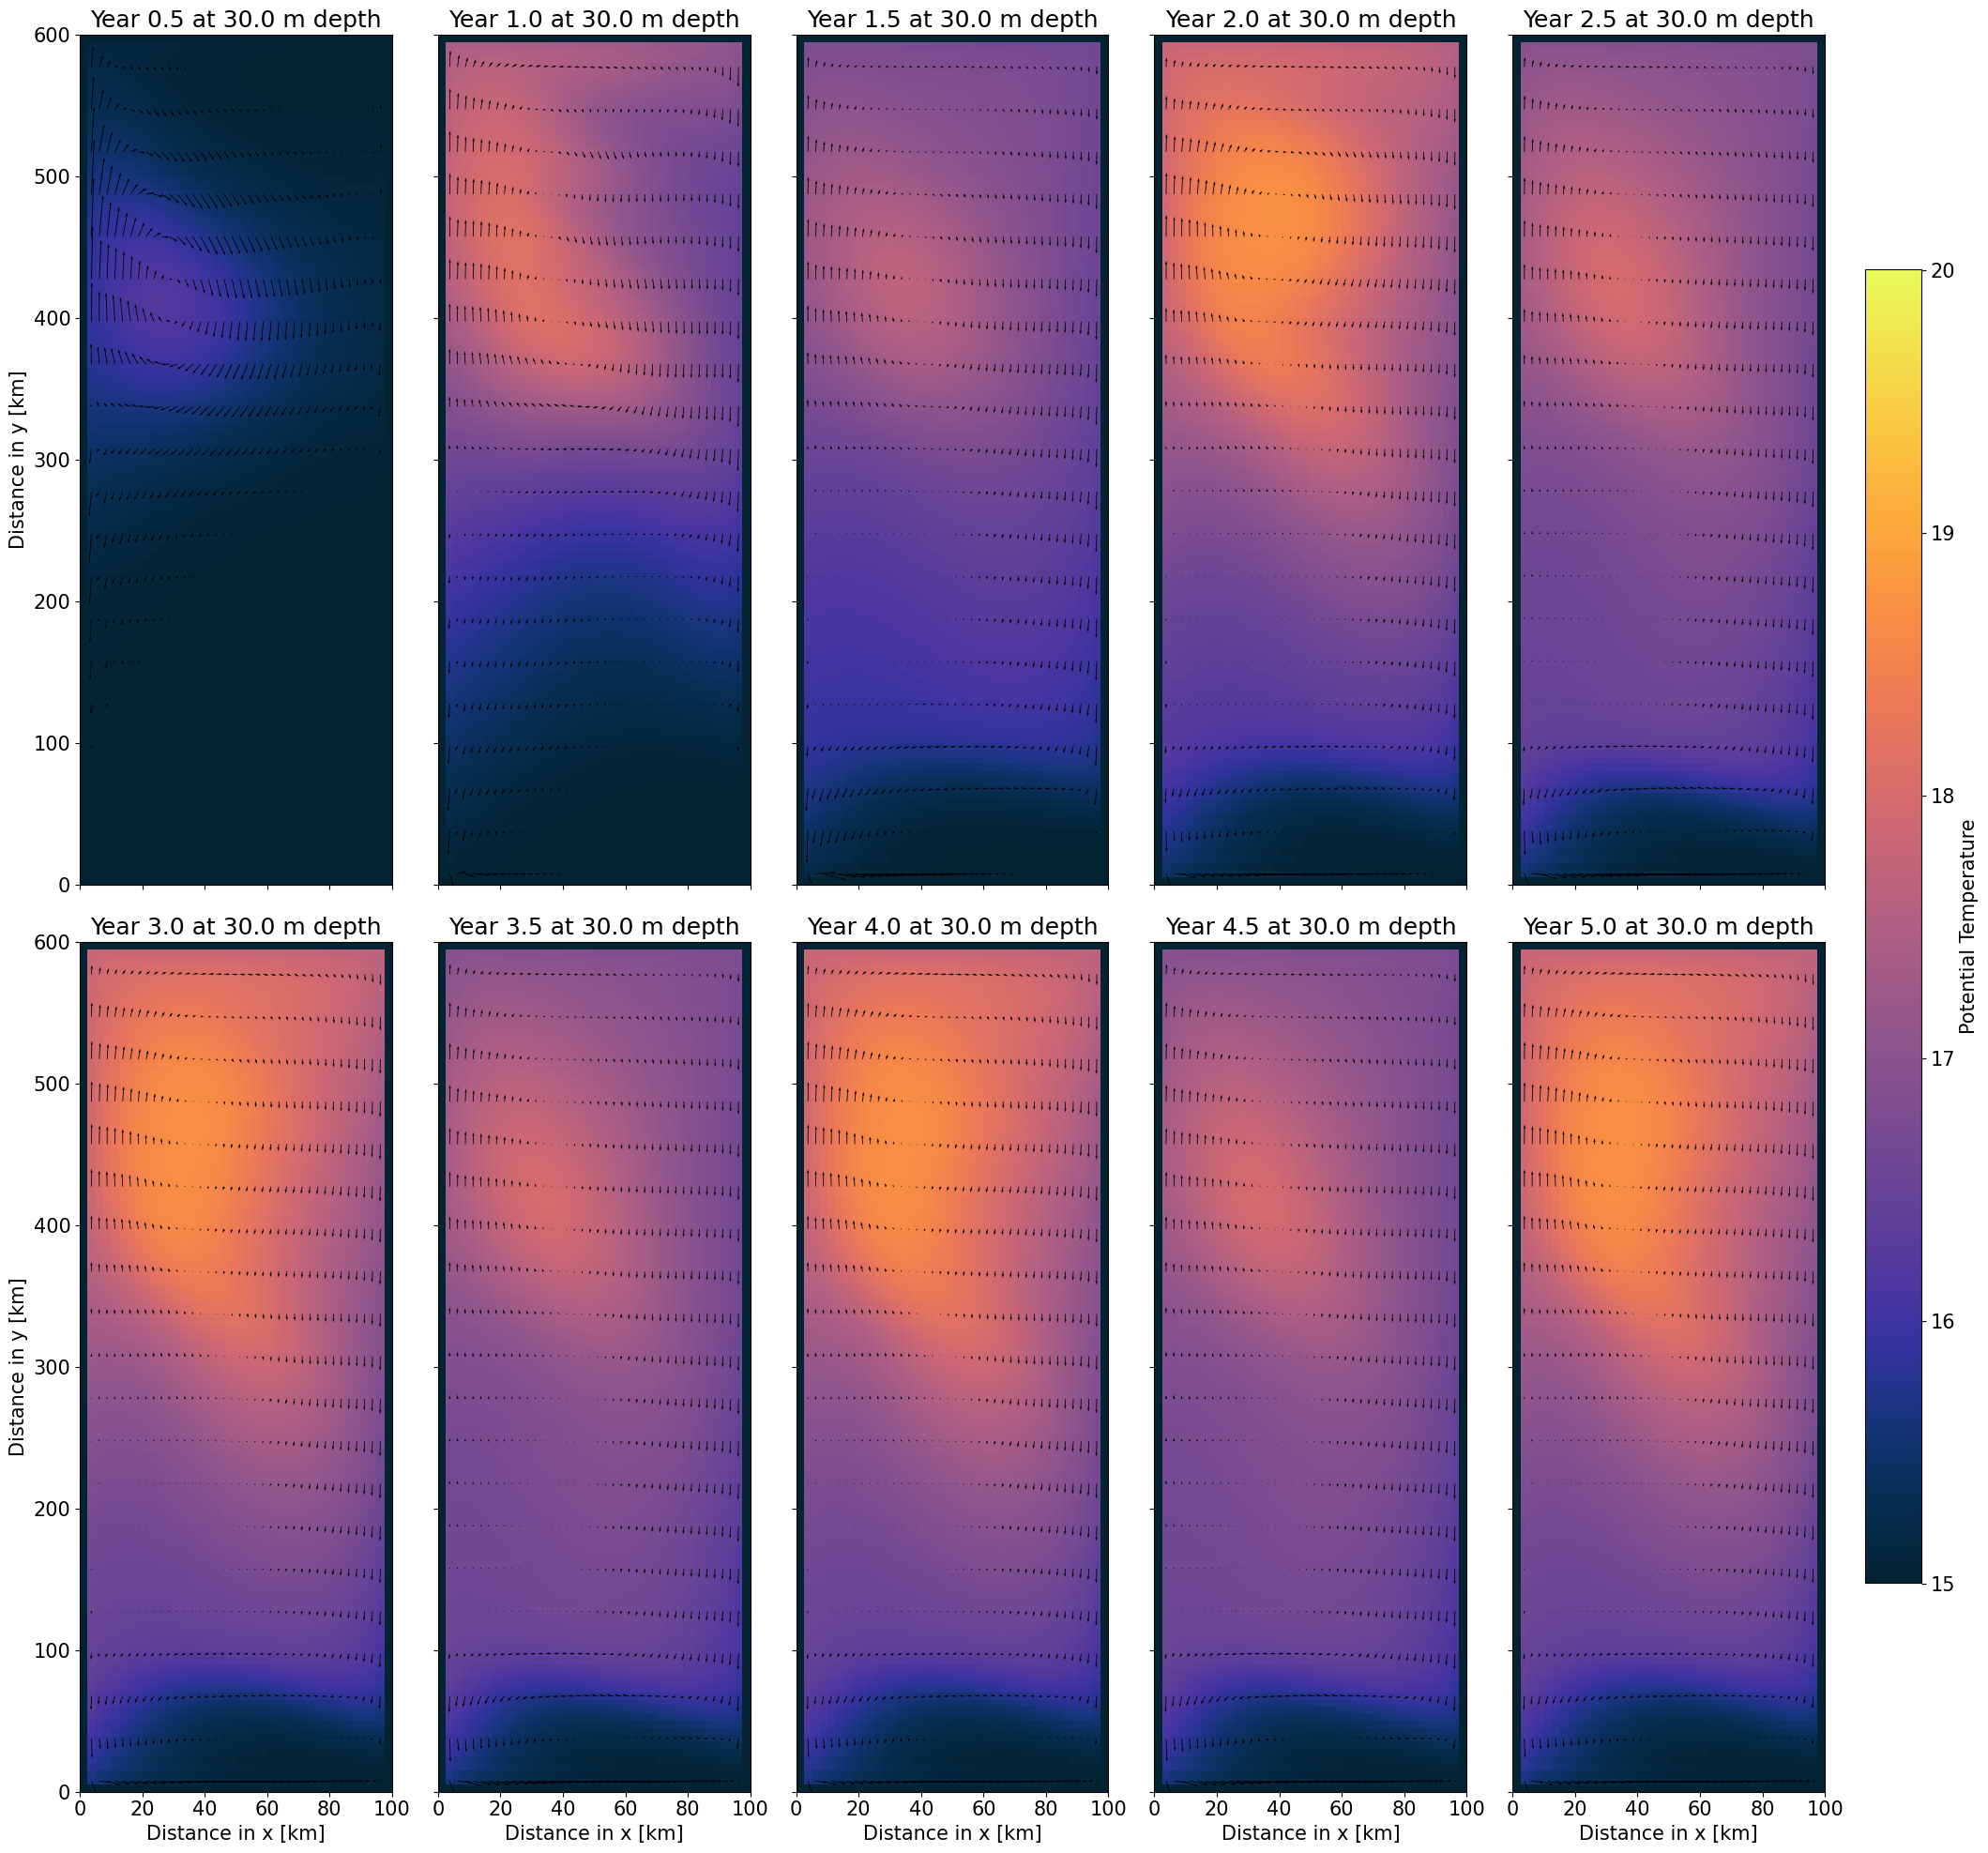

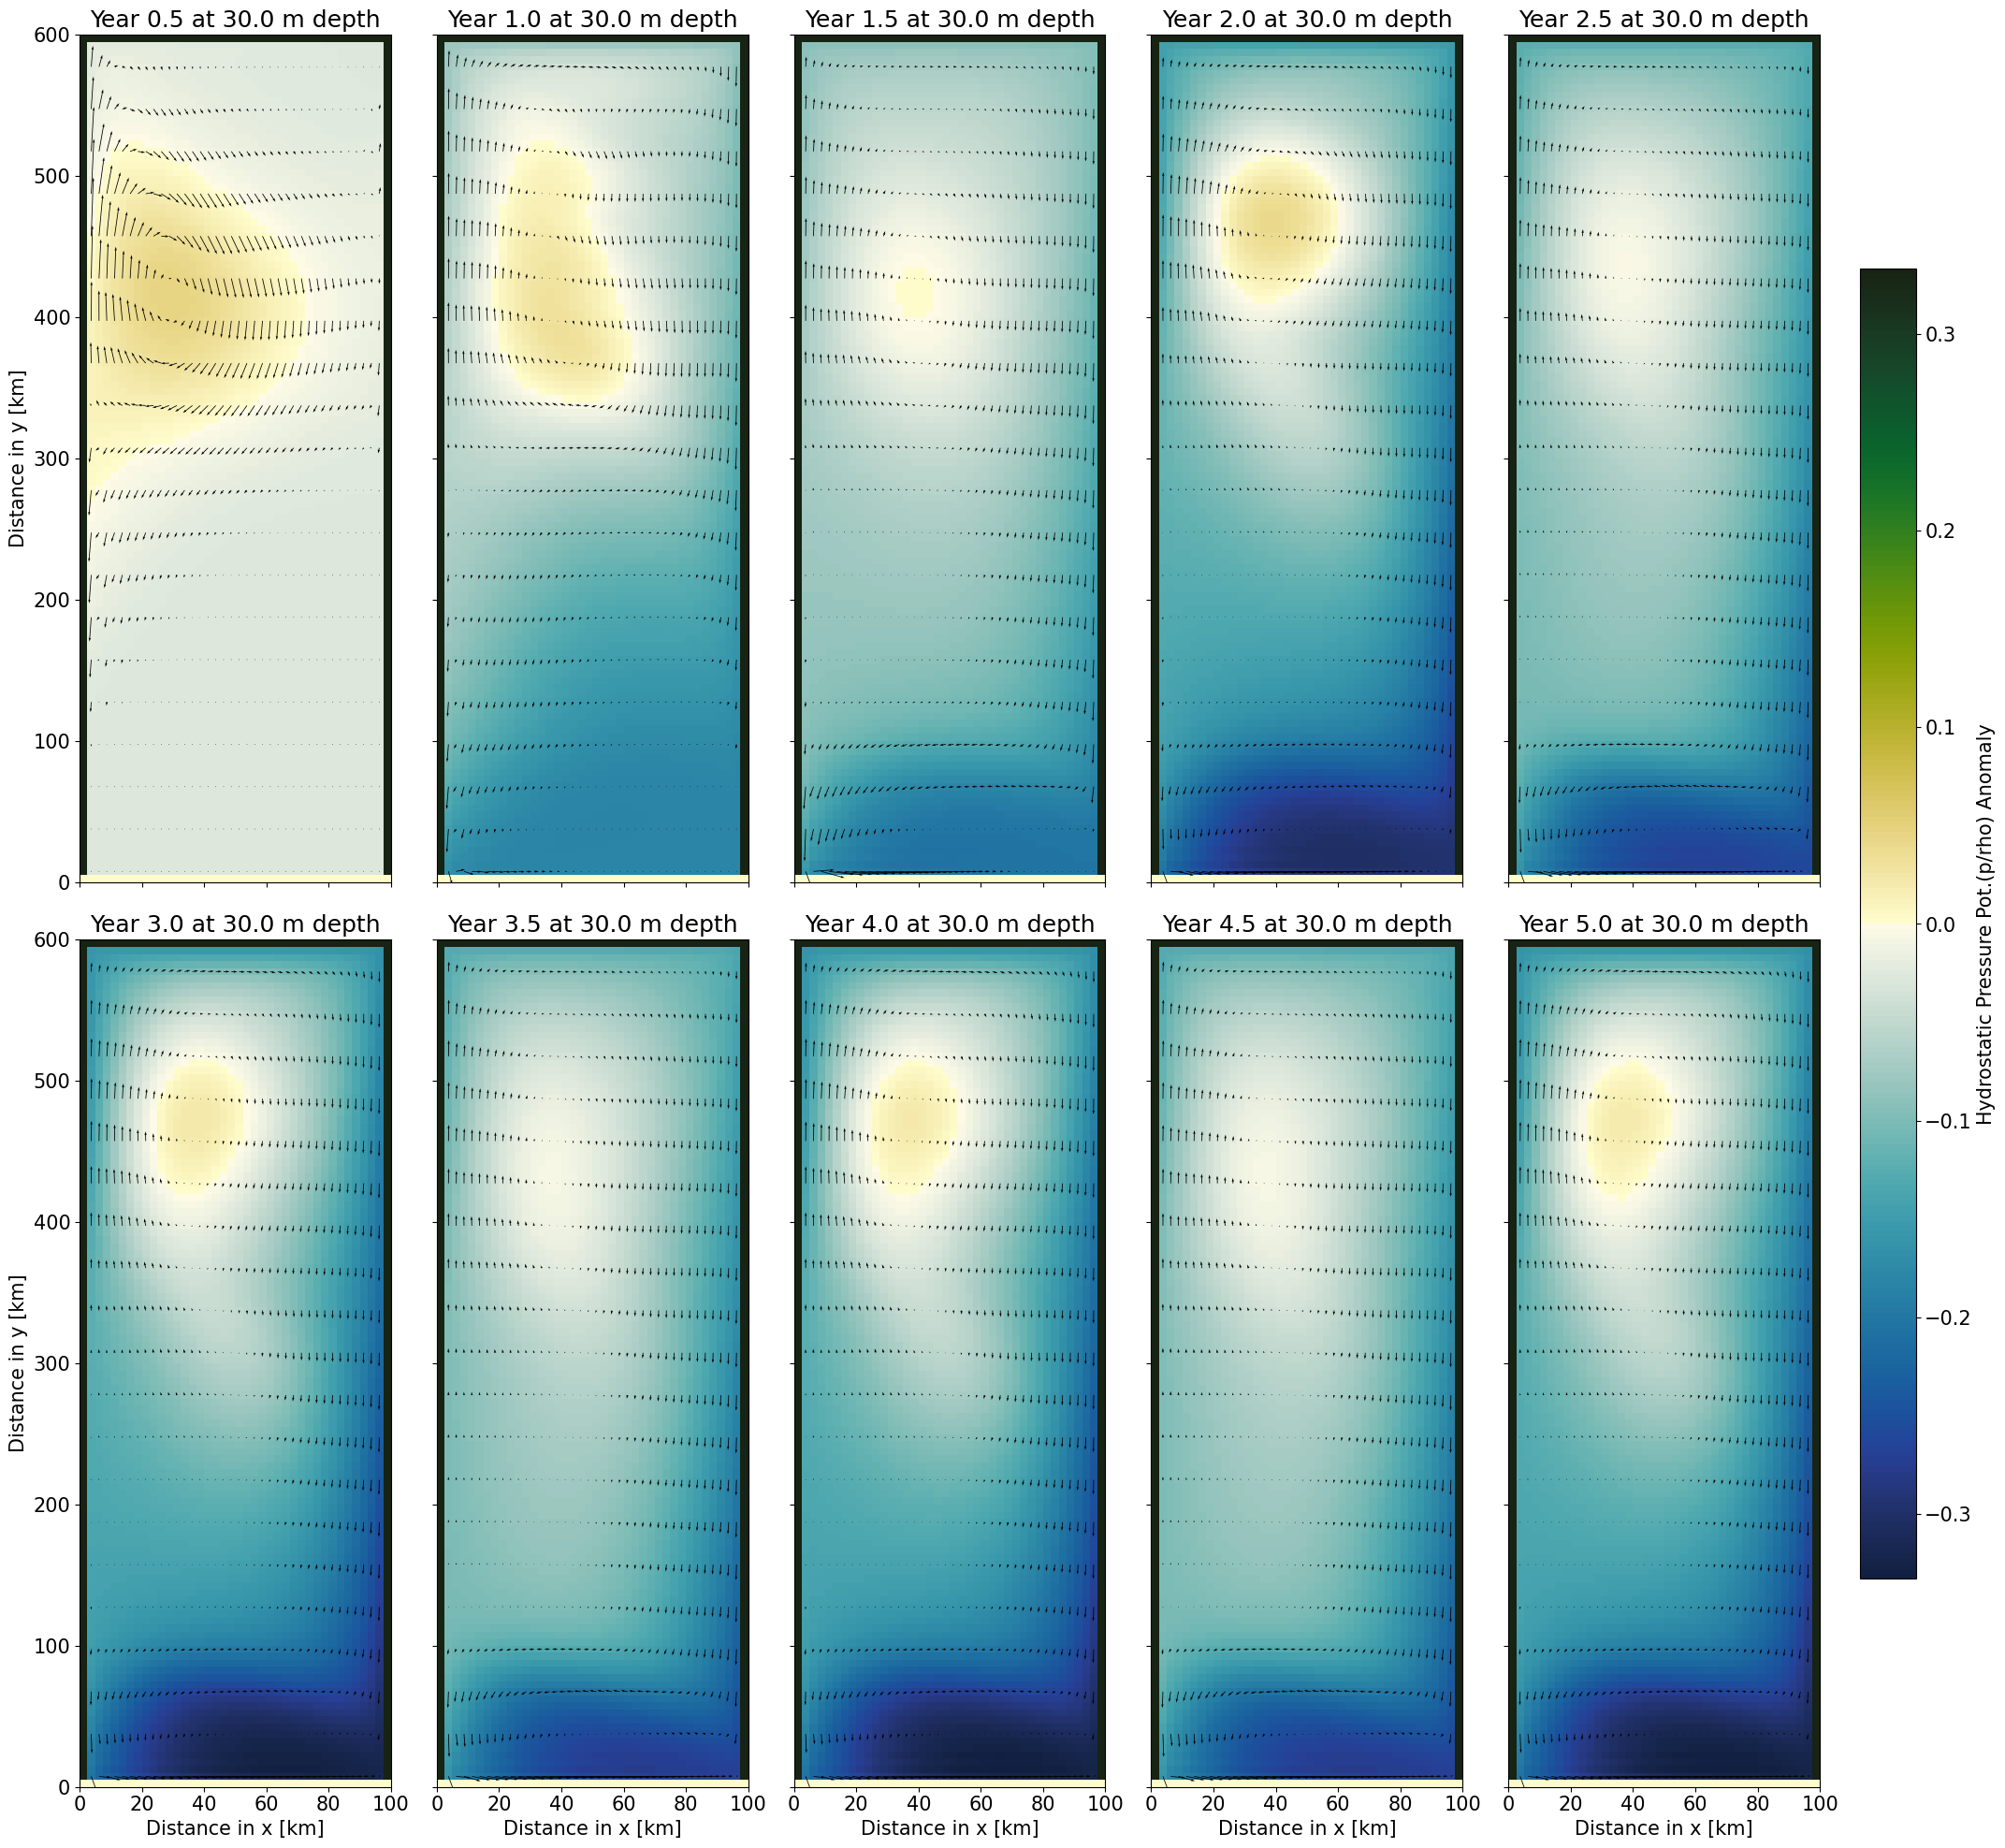

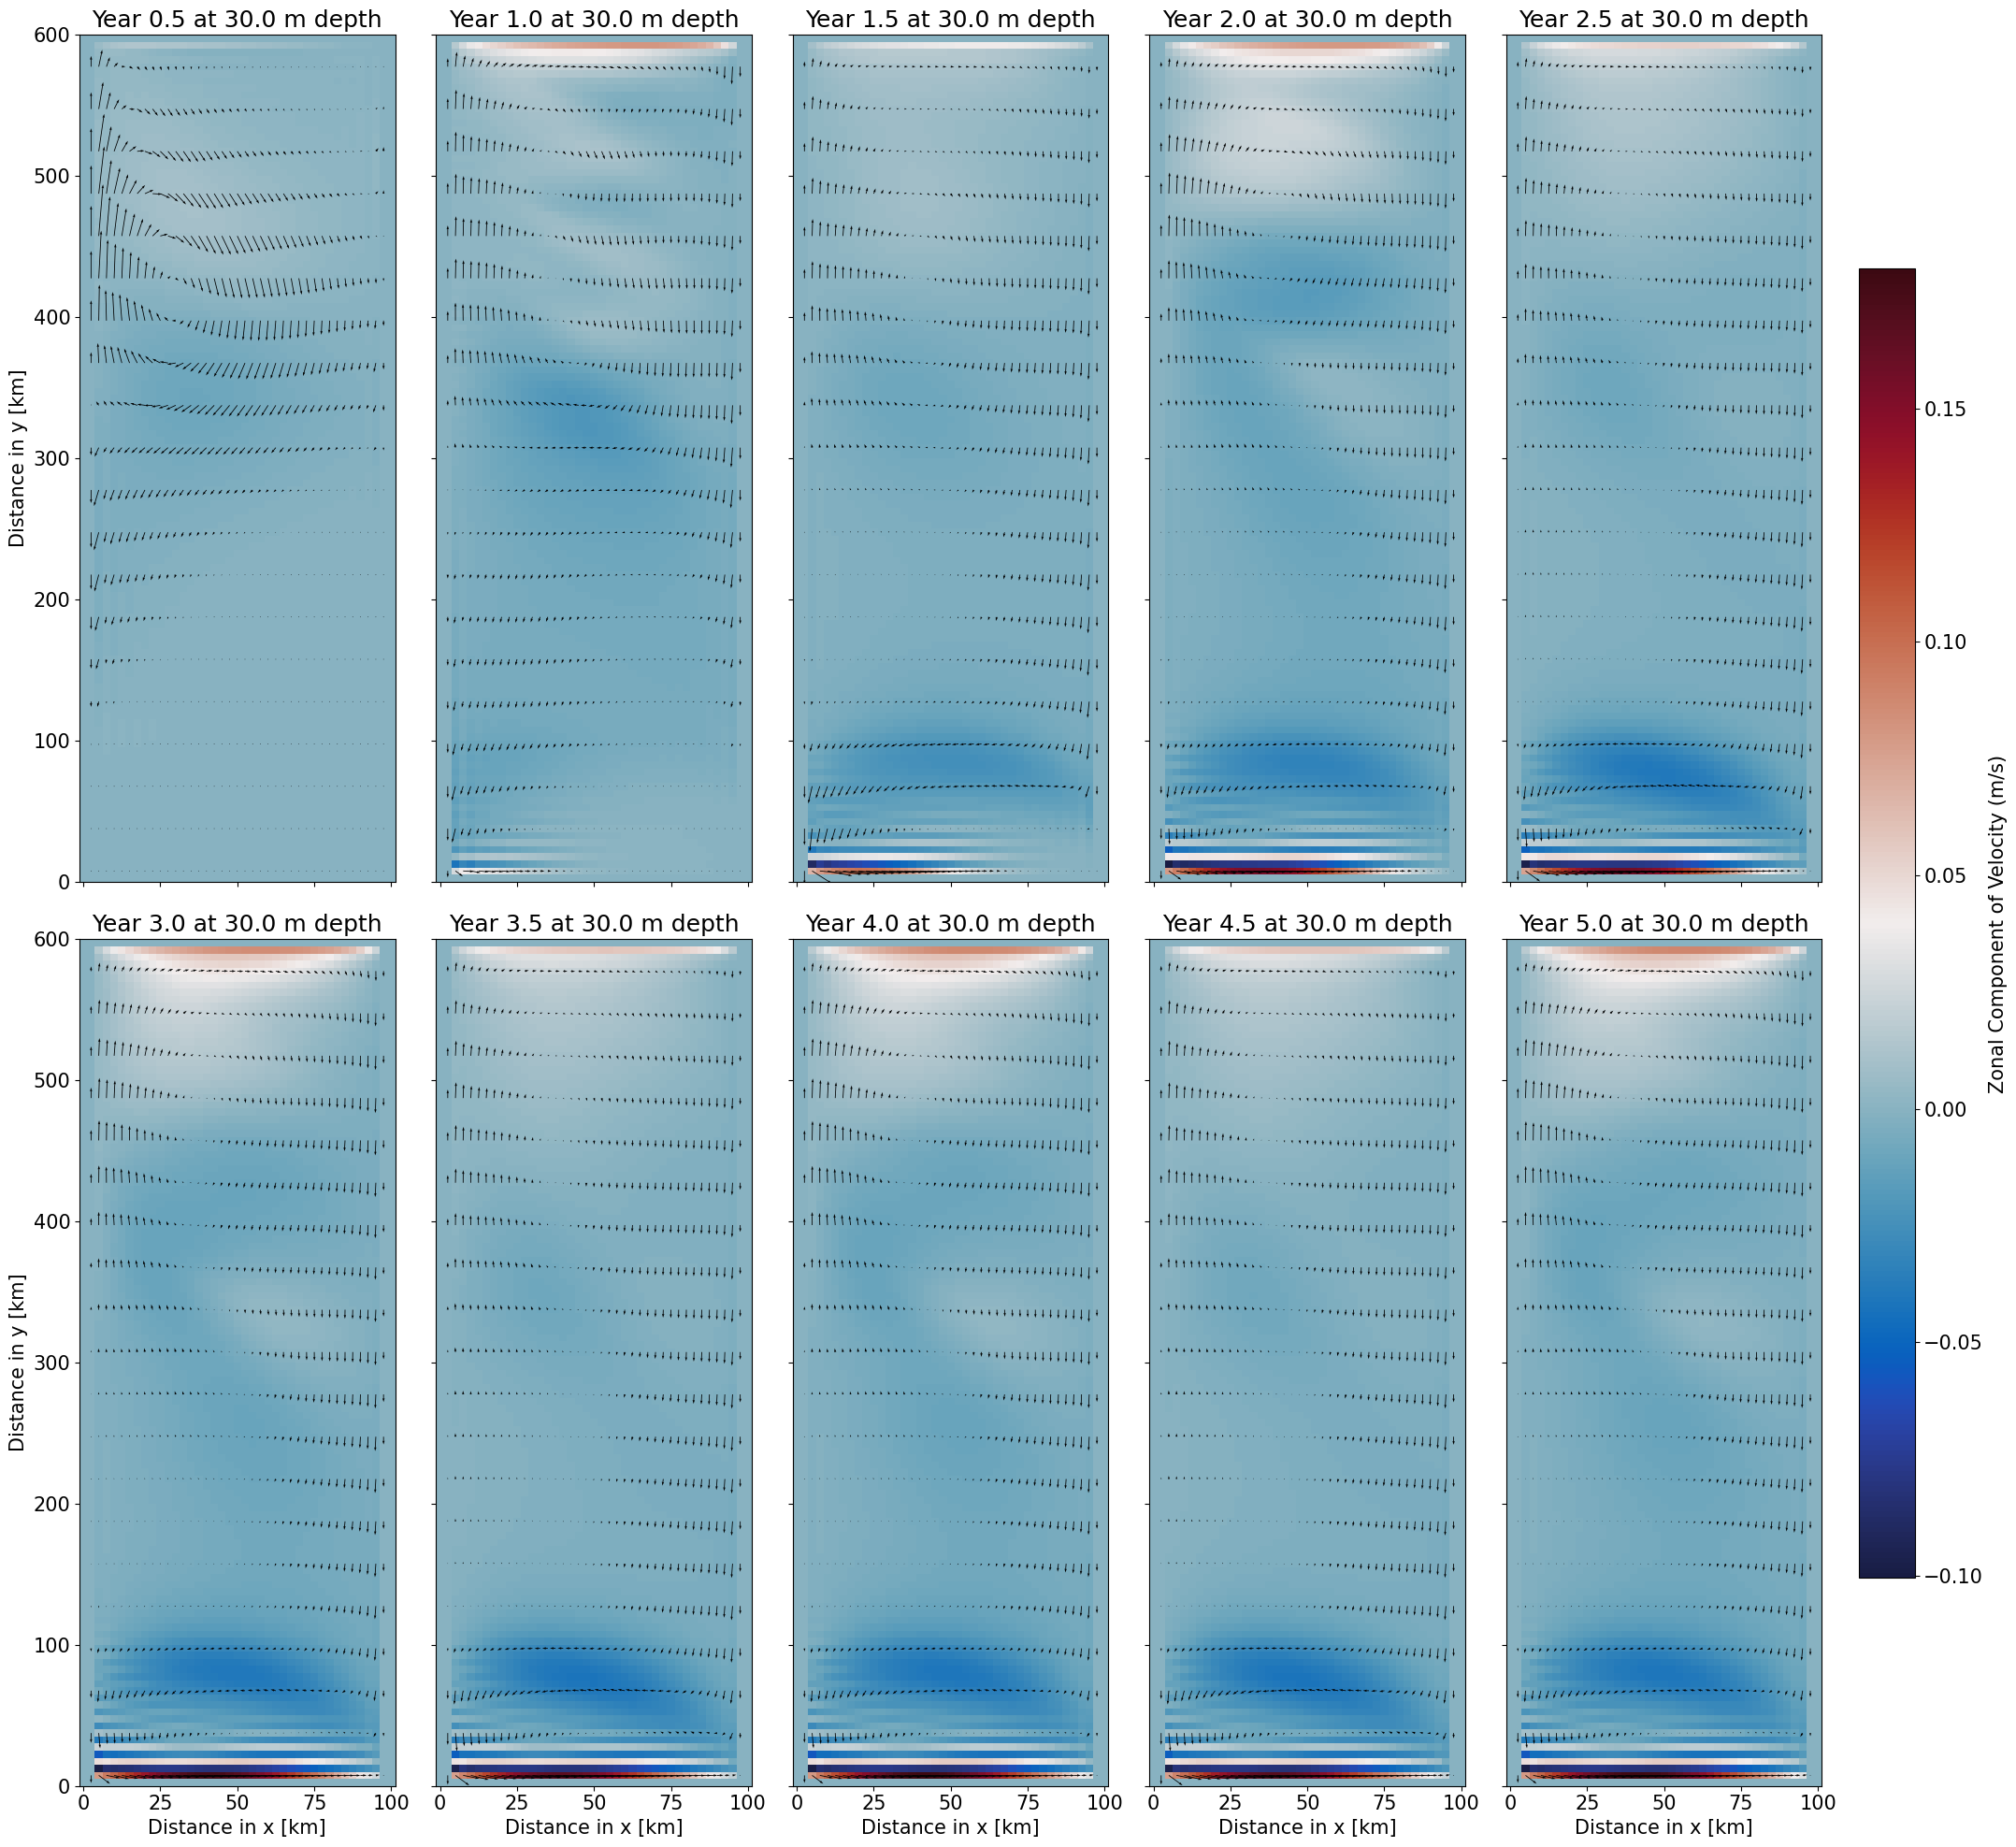

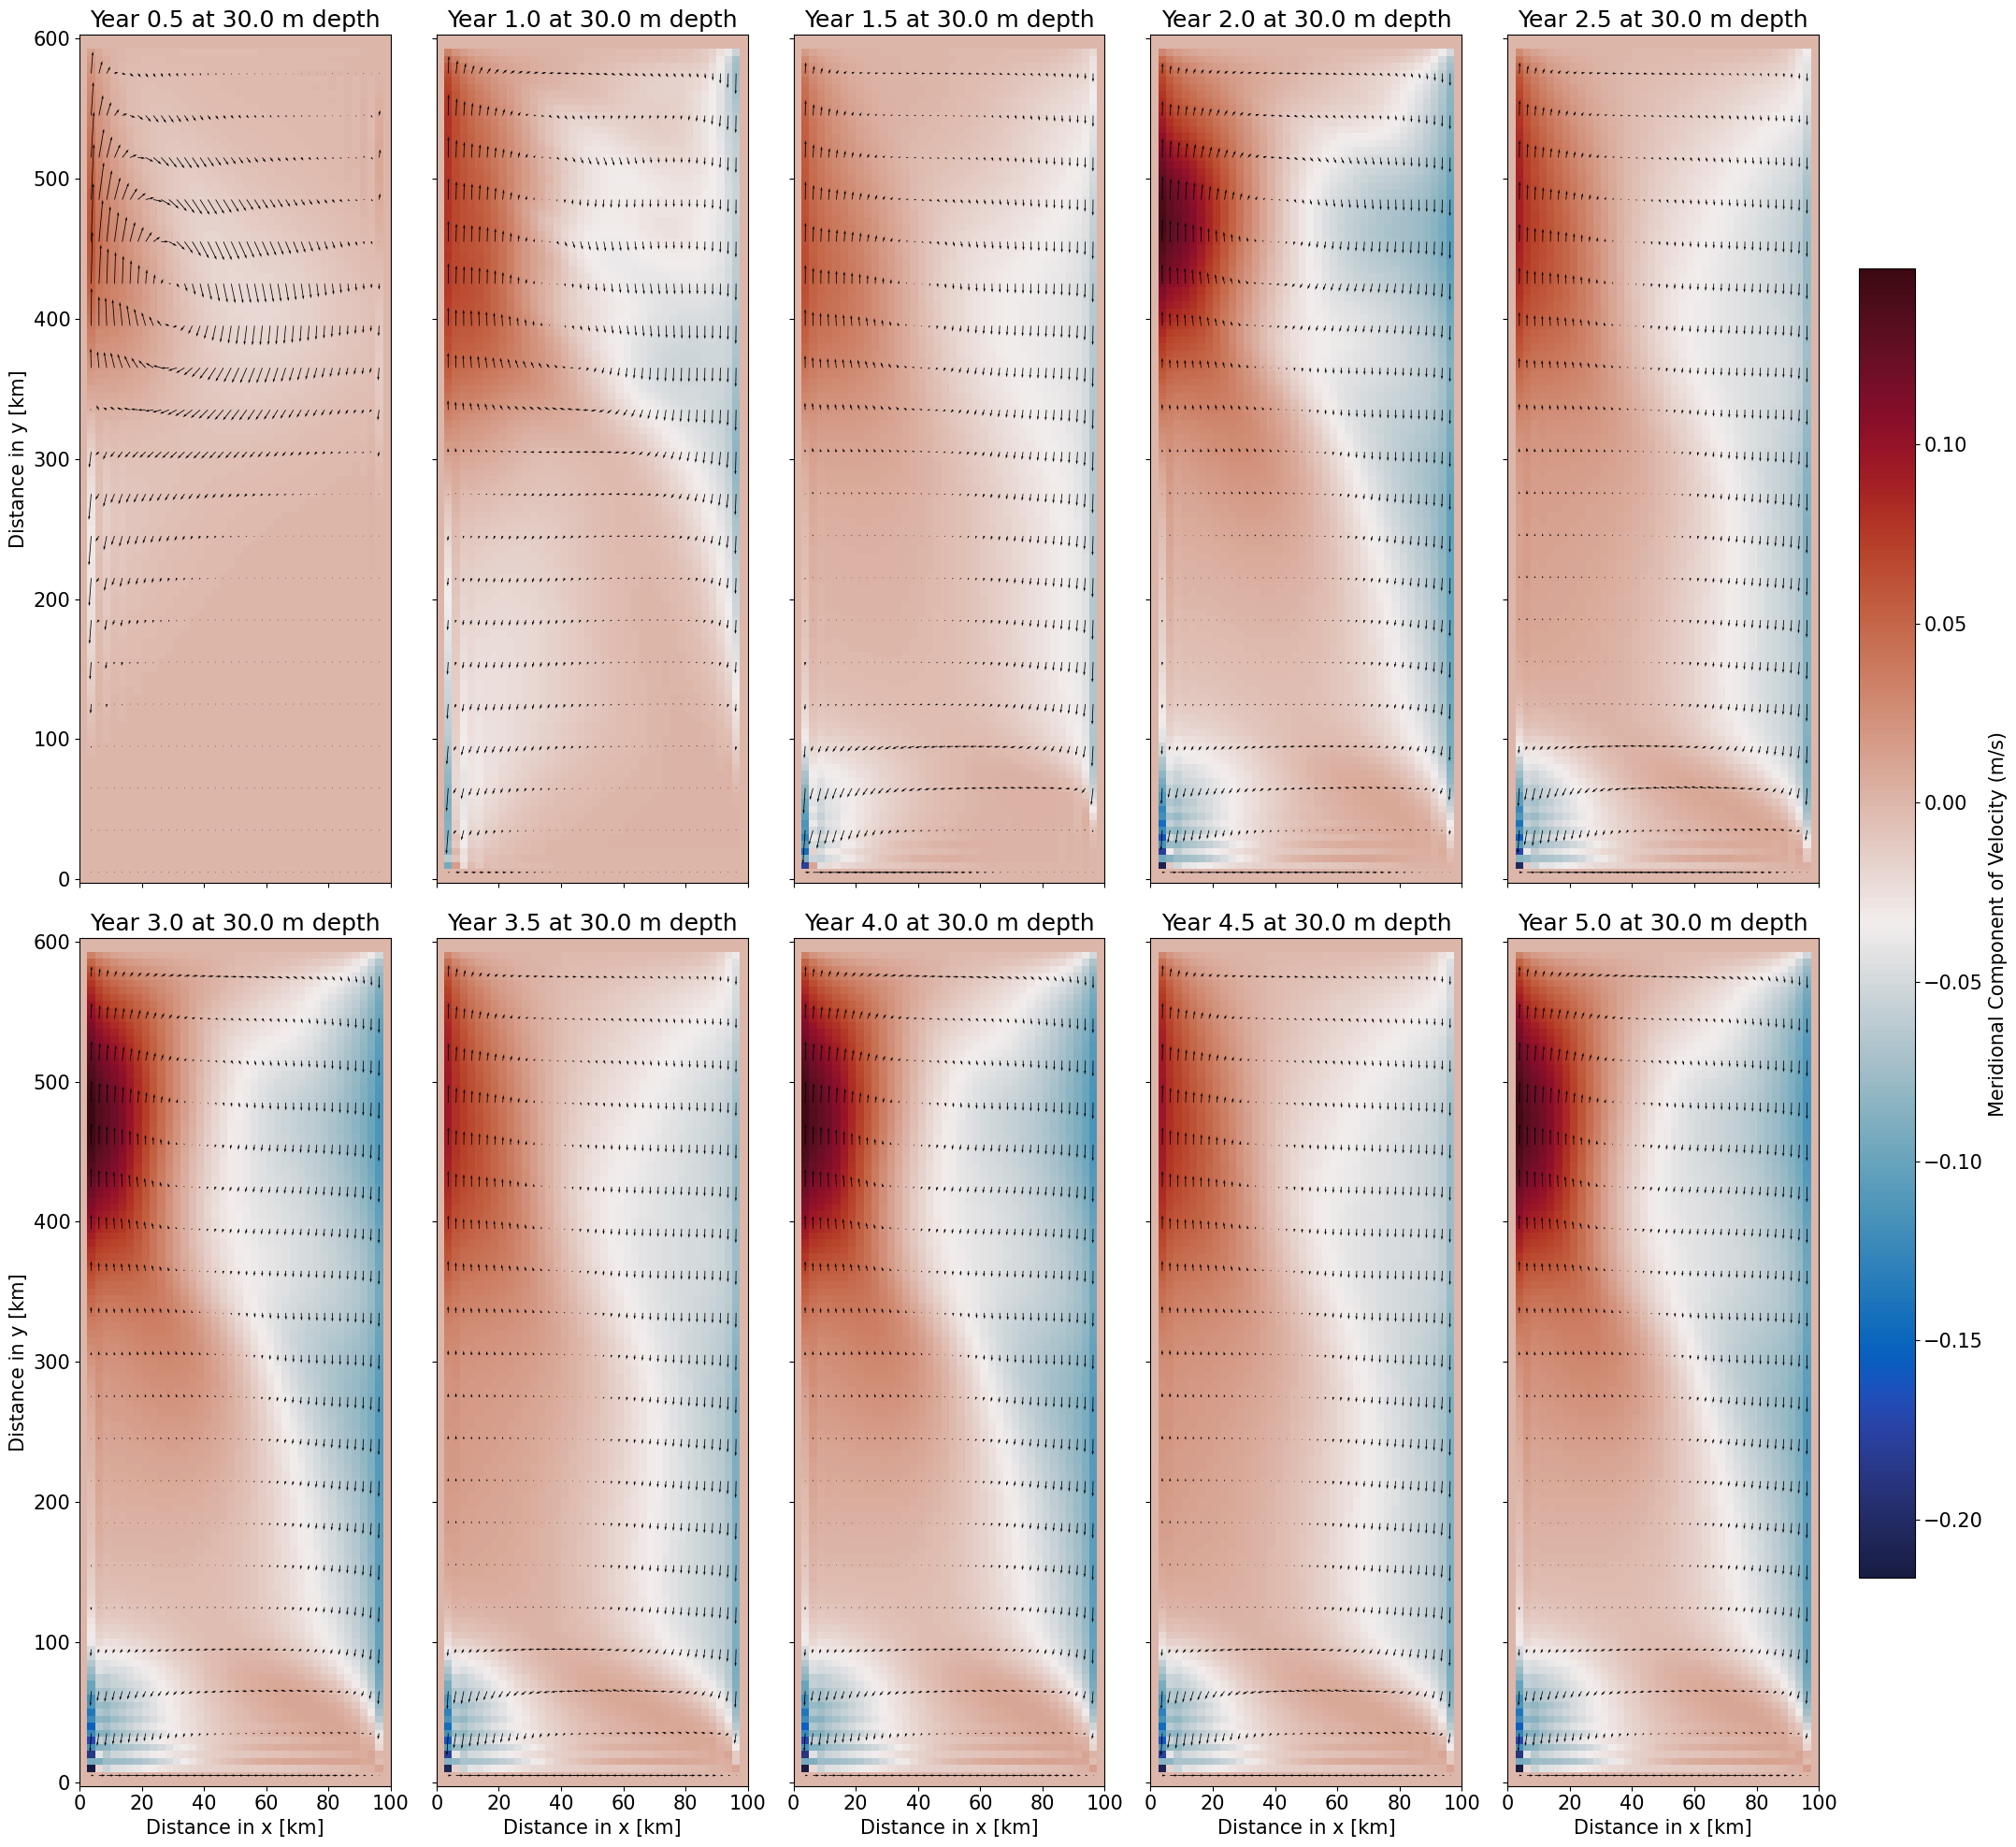

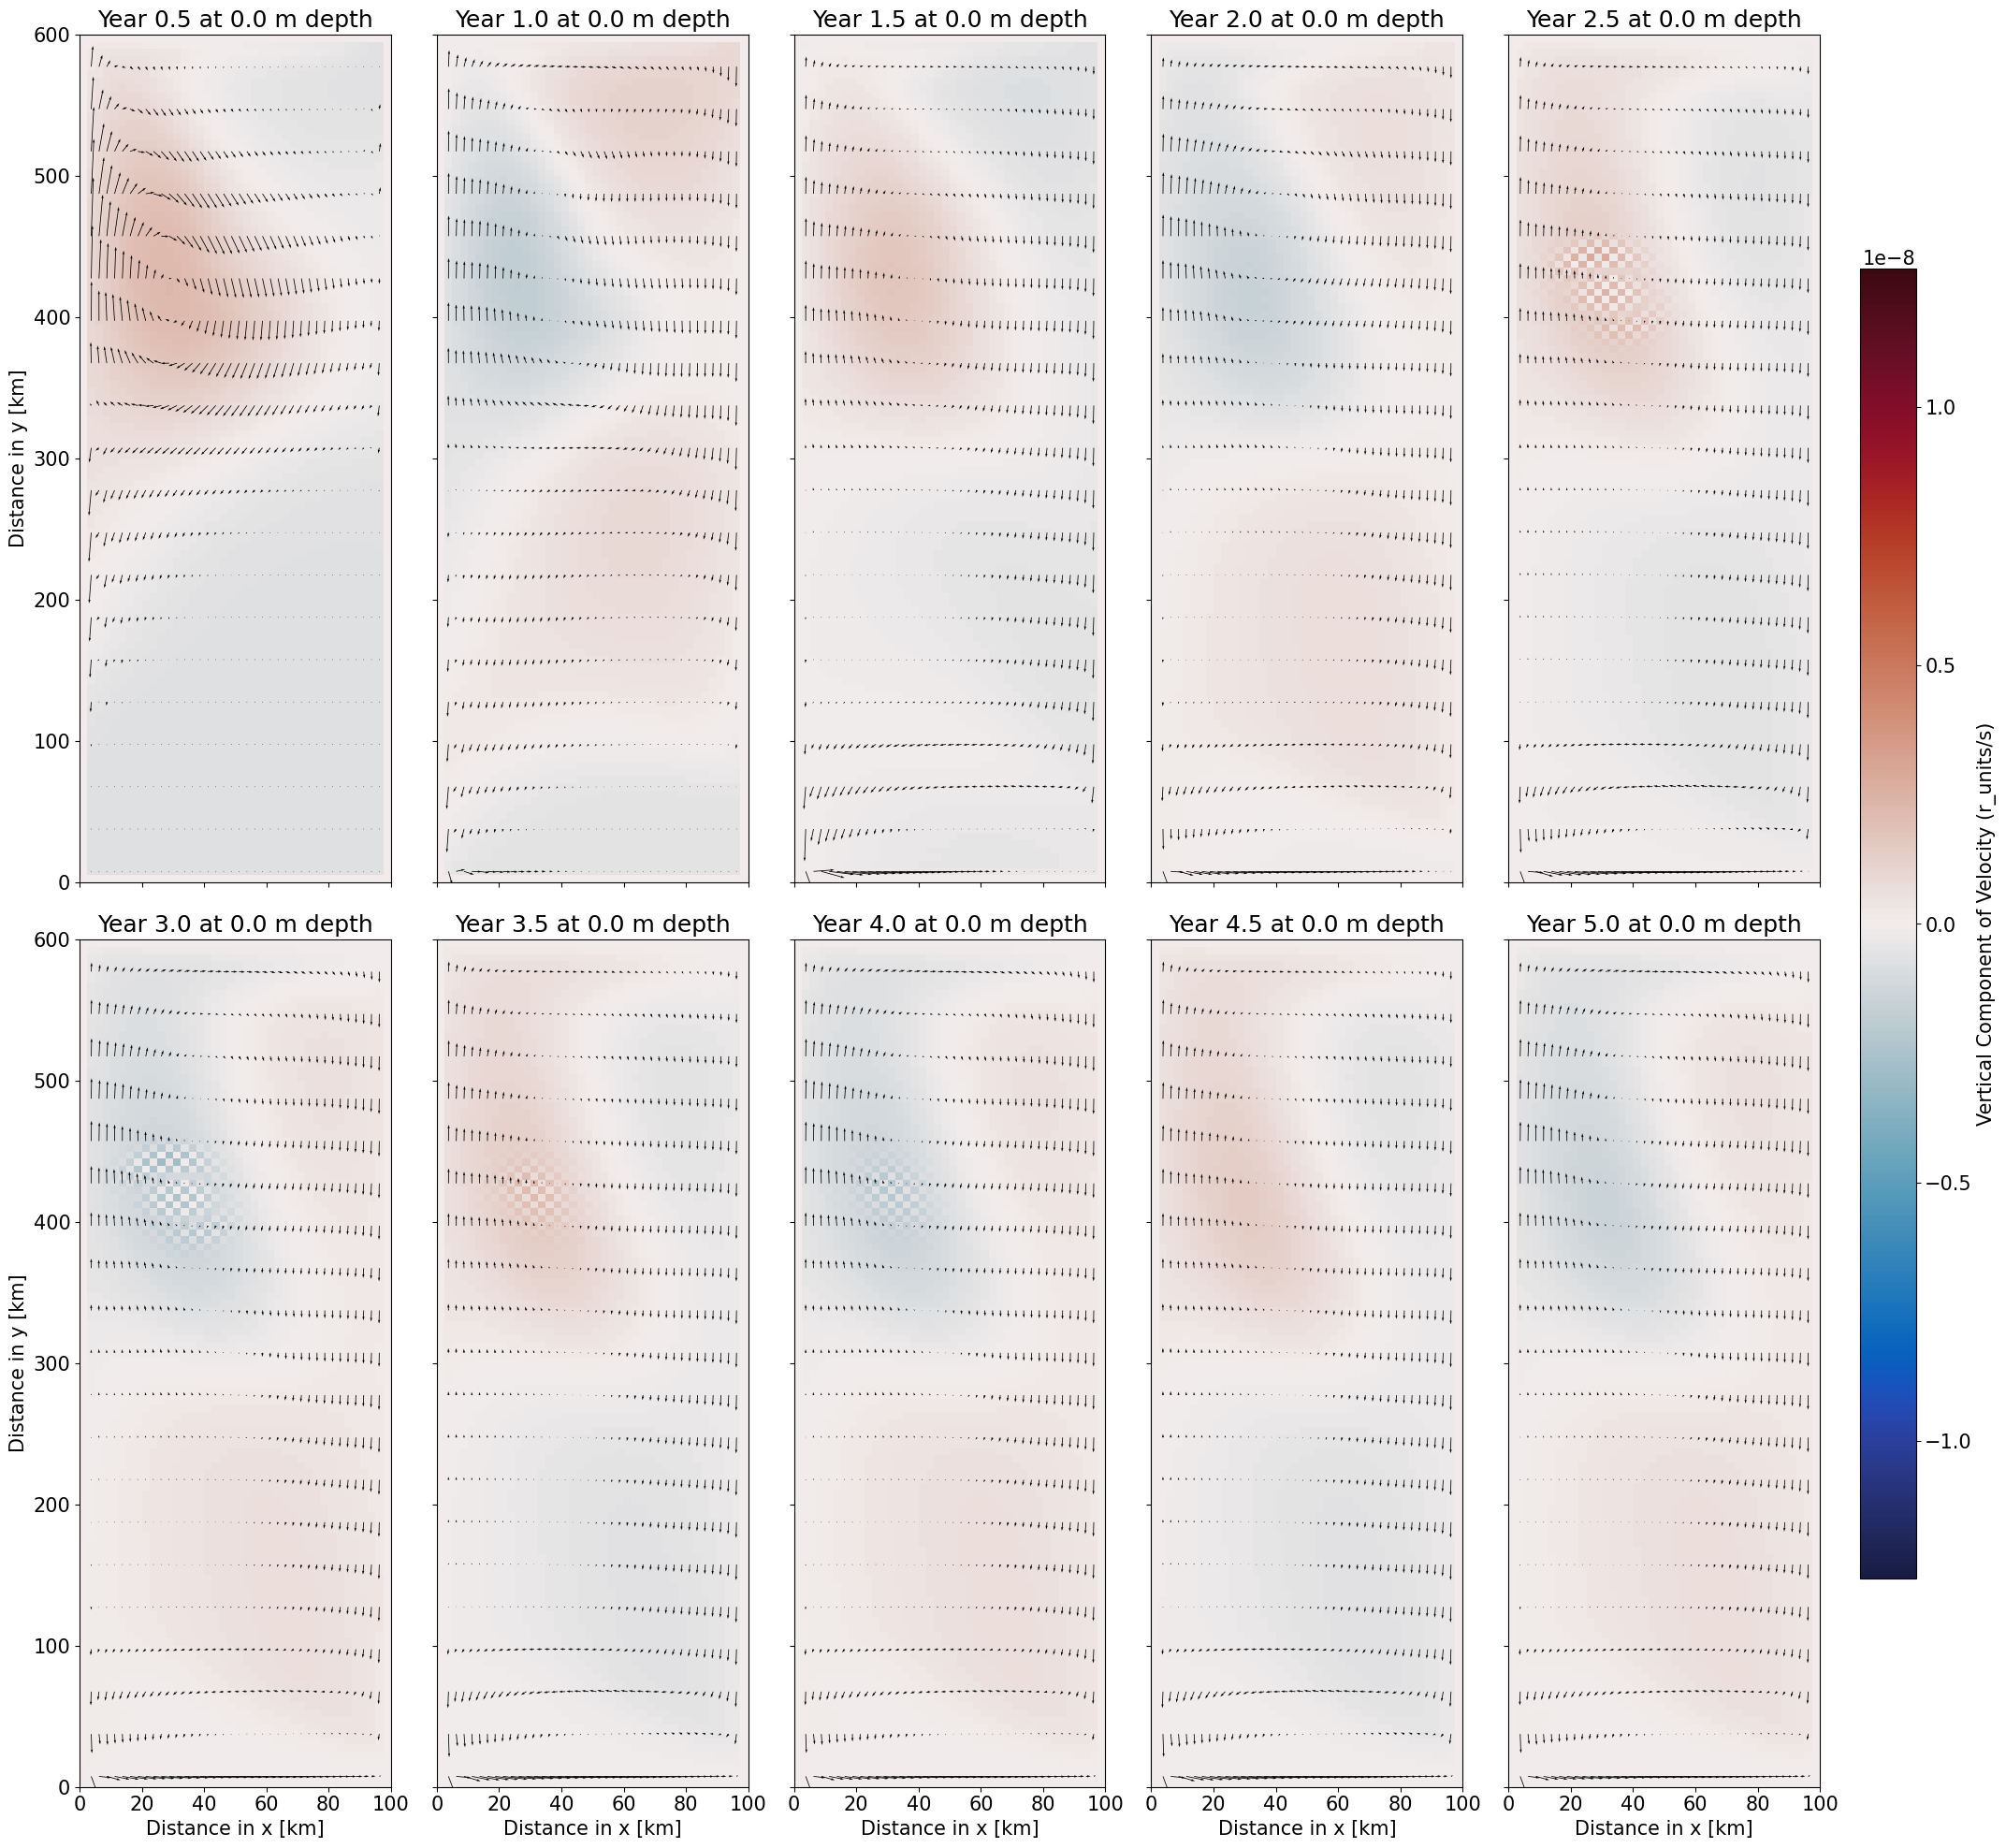

In [43]:
t=0
space=6

VARS=list(ds.keys())[2:-6]


for variable in VARS:

    exec(f'varin=ds.{variable}')
    title= varin.description 
    if variable == 'VVEL' or  variable == 'VRHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WV_VEL':
        Yin=ds.Yp1
    else:
        Yin=ds.Y
    if variable == 'UVEL' or  variable == 'URHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WU_VEL':
        Xin=ds.Xp1
    else:
        Xin=ds.X
    if variable == 'WU_VEL' or variable == 'WV_VEL' or  variable == 'WRHOMASS' or  variable == 'WVEL':
        Zin=-ds.Zld000010
        dep=0
    else:
        Zin=-ds.Zmd000010
        dep=30

    if variable == 'THETA':
        vmin=15
        vmax=20
        cmapi=cmocean.cm.thermal
    elif variable == 'PHIHYD':
        vmin=np.min(varin[3].values)
        vmax=-np.min(varin[3].values)
        cmapi=cmocean.cm.delta
    elif variable == 'WVEL' or  variable == 'WRHOMASS': 
        vmin=np.min(varin.values)*1e-5
        vmax=-np.min(varin.values)*1e-5
        cmapi=cmocean.cm.balance
    else: 
        vmin=np.min(varin)
        vmax=np.max(varin)
        cmapi=cmocean.cm.balance

    levels=np.linspace(vmin,vmax,15)

    fig,ax=plt.subplots(2,5)

    for i in range(10):
        tin=t+(1*i)
        if i<=4:
            axin=ax[0,i]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>4,i<=9):
            axin=ax[1,i-5]
            axin.set(xlabel='Distance in x [km]')
        if i==0 or i==10 or i==5 :
            axin.set(ylabel='Distance in y [km]')
        else: 
            axin.yaxis.set_tick_params(labelleft=False)


        timein=ds.T[tin]/(60*60*24)
        cax0=axin.pcolormesh(Xin/1000, Yin/1000, varin[tin,0,:,:],vmin=vmin,vmax=vmax,cmap=cmapi)
        axin.set(title=f'Year {timein/360:.1f} at {dep:.1f} m depth')
        
        
        gridY,gridX=np.meshgrid(Yin[1:-1].values,Xin[1:-1].values)

        interpV=sciint.RegularGridInterpolator((ds.Yp1.values,ds.X.values),ds.VVEL[tin,0,:,:].values)
        V=interpV((gridY,gridX))

        interpU=sciint.RegularGridInterpolator((ds.Y.values,ds.Xp1.values),ds.UVEL[tin,0,:,:].values)
        U=interpU((gridY,gridX))

        axin.quiver(gridX[:,np.arange(0,len(gridY[0,:]),space)]/1000,gridY[:,np.arange(0,len(gridY[0,:]),space)]/1000,U[:,np.arange(0,len(gridY[0,:]),space)],V[:,np.arange(0,len(gridY[0,:]),space)])


    cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
    fig.colorbar(cax0, cax=cbar_ax)
    cbar_ax.set_ylabel(title)

    fig.tight_layout()

    fig.patch.set_alpha(0.0)
    plt.savefig('../' + str(project)+'/Figures/' + str(ed)+ '5Years' + str(variable) +  str(dep) + 'm.png', bbox_inches='tight')

In [44]:
t=0
surf=0

VARS=['ETAN']
d=0
#for variable in VARS:
variable=VARS[-1]
if variable == 'Vvel':
    varin=ds.V[:,d,:,:]
    dep=surf + d*surf
    Yin=ds.Yp1
    Xin=ds.X
    vmin=-0.1
    vmax=0.1
    title= 'V-velocity [m/s]' #'Temperature [°C]'
    cmapi=cmocean.cm.balance
elif variable == 'Temp':
    varin=ds.Temp[:,d,:,:]
    title= 'Temperature [°C]'
    dep=surf + d*surf
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.thermal
    vmin=13
    vmax=19
elif variable == 'Sal':
    varin=ds.S[:,d,:,:]
    dep=surf + d*surf
    title='Salinity [g/kg]'
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.haline
    vmin=29
    vmax=33
elif variable == 'ETAN':
    varin=ds.ETAN[:,0,:,:]
    dep=0
    title='SSH [m]'
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.curl
    vmin=-0.03
    vmax=0.03
elif variable == 'Uvel':
    dep=surf + d*surf
    varin=ds.U[:,d,:,:]
    Yin=ds.Y
    Xin=ds.Xp1
    vmin=-0.14
    vmax=0.14
    title= 'U-velocity [m/s]' #'Temperature [°C]'


levels=np.linspace(vmin,vmax,15)

fig,ax=plt.subplots(2,5)

for i in range(10):
    tin=110+(1*i)
    if i<=4:
        axin=ax[0,i]
        axin.xaxis.set_tick_params(labelbottom=False)
    elif np.logical_and(i>4,i<=9):
        axin=ax[1,i-5]
        axin.set(xlabel='Distance in x [km]')
    if i==0 or i==10 or i==5 :
        axin.set(ylabel='Length-Distance [km]')
    else: 
        axin.yaxis.set_tick_params(labelleft=False)


    timein=ds.T[tin]/(60*60*24)
    cax0=axin.pcolormesh( Xin/1000, Yin/1000, varin[tin],cmap=cmapi) 
    axin.set(title=f'Year {timein/360:.1f}')
    #plt.colorbar(cax0)

cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
fig.colorbar(cax0, cax=cbar_ax)
cbar_ax.set_ylabel(title)

fig.suptitle('Depth ' + str(dep) + ' m')
fig.tight_layout()

fig.patch.set_alpha(0.0)
plt.savefig('../' + str(project)+'/Figures/' + str(ed)+ '5Years' + str(variable) +  str(dep) + 'm.png', bbox_inches='tight')

AttributeError: 'Dataset' object has no attribute 'ETAN'

In [ ]:
def animateETA(t):
    tin=t
    tt=ds.T[t].values/(60*60*24)
    print(tin)
    varin = ds.Temp[tin,:,:,10]
    

    cax.set_array(varin)
    ax.set_title(f'After {tt:.1f} hours')


In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='AM'), bitrate=2000)


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
0


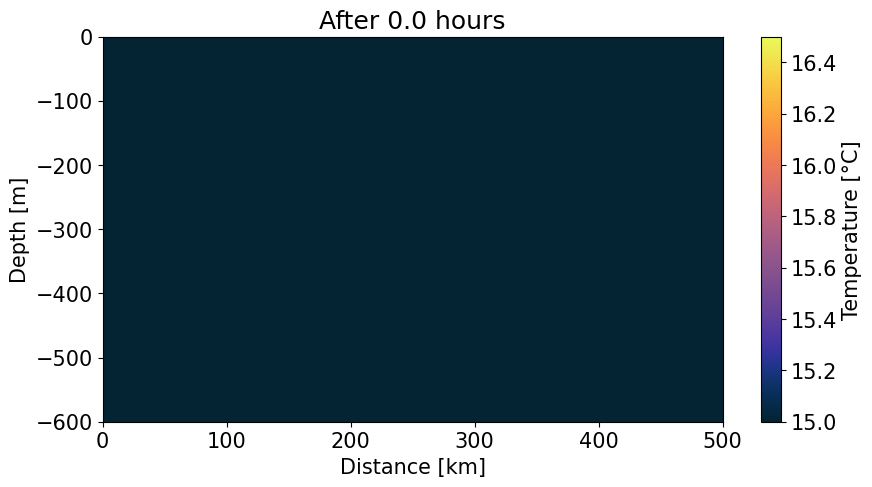

In [94]:
fig, ax = plt.subplots()
    
vmin=15
vmax=16.5
t=0
tt=ds.T[t].values/(60*60*24)
xlab='Distance [km]'
ylab='Depth [m]'
cmapi=cmocean.cm.thermal
title='Temperature [°C]'


ax.set_facecolor('wheat')
cax = ax.pcolormesh(ds.Y/1000, ds.Z,ds.Temp[t,:,:,10],cmap=cmapi,vmin=vmin,vmax=vmax)

ax.set(xlabel=xlab, ylabel=ylab)

ax.set_title(f'After {tt:.1f} hours')   
cbar = plt.colorbar(cax)
cbar.set_label(title)


anim = FuncAnimation(fig, animateETA,frames=len(ds.T), repeat=False)

anim.save('ChangeDim/Figures/Temp.mp4', writer=writer, dpi=600)